In [1]:
# Callback to ramp lam_phys in model.loss via attribute; implement as example where model has attribute lam_phys
import tensorflow as tf

class LambdaRamp(tf.keras.callbacks.Callback):
    def __init__(self, start_epoch, end_epoch, final_value):
        self.start = start_epoch
        self.end = end_epoch
        self.final = final_value
    def on_epoch_begin(self, epoch, logs=None):
        if epoch < self.start:
            val = 0.0
        elif epoch >= self.end:
            val = self.final
        else:
            val = (epoch - self.start)/(self.end - self.start) * self.final
        # store in model for your physics loss lambda to read
        setattr(self.model, "lam_phys_current", float(val))
        # optional logging
        print(f"Epoch {epoch}: lam_phys_current={val:.6f}")

# Modify physics loss lambda in compile to read model.lam_phys_current; easiest: implement phys loss using closure that reads model attribute
# Example usage:
ramp_cb = LambdaRamp(start_epoch=5, end_epoch=40, final_value=1.0)
# pass ramp_cb to fit callbacks


# Our optimal Pinn on Full Datset 163k

In [2]:
import numpy as np, pandas as pd

# --- 1) Load dataset ---
df = pd.read_csv("phase_t1.0_U25.0-(0.1)_Mu60.0-(0.1).csv")

# Phase label
df["Phase"] = (df["Phi2"] > 1e-6).astype(int)

print(df)

          t  Ubar  Mubar       Density          Phi2        Energy  Iters  \
0       1.0   0.0   -5.0  1.048576e-14  1.048576e-14  2.097152e-13      8   
1       1.0   0.0   -4.9  1.508449e-14  1.508449e-14  2.882646e-13      8   
2       1.0   0.0   -4.8  2.186340e-14  2.186340e-14  3.987884e-13      8   
3       1.0   0.0   -4.7  3.193733e-14  3.193733e-14  5.553901e-13      8   
4       1.0   0.0   -4.6  4.703477e-14  4.703477e-14  7.788958e-13      8   
...     ...   ...    ...           ...           ...           ...    ...   
163396  1.0  25.0   59.6  3.000000e+00  8.530376e-13 -1.038000e+02     21   
163397  1.0  25.0   59.7  3.000000e+00  7.586920e-13 -1.041000e+02     21   
163398  1.0  25.0   59.8  3.000000e+00  6.791729e-13 -1.044000e+02     21   
163399  1.0  25.0   59.9  3.000000e+00  6.119027e-13 -1.047000e+02     21   
163400  1.0  25.0   60.0  3.000000e+00  5.548081e-13 -1.050000e+02     21   

        Phase  
0           0  
1           0  
2           0  
3          

          t  Ubar  Mubar       Density          Phi2        Energy  Iters  \
0       1.0   0.0   -5.0  1.048576e-14  1.048576e-14  2.097152e-13      8   
1       1.0   0.0   -4.9  1.508449e-14  1.508449e-14  2.882646e-13      8   
2       1.0   0.0   -4.8  2.186340e-14  2.186340e-14  3.987884e-13      8   
3       1.0   0.0   -4.7  3.193733e-14  3.193733e-14  5.553901e-13      8   
4       1.0   0.0   -4.6  4.703477e-14  4.703477e-14  7.788958e-13      8   
...     ...   ...    ...           ...           ...           ...    ...   
163396  1.0  25.0   59.6  3.000000e+00  8.530376e-13 -1.038000e+02     21   
163397  1.0  25.0   59.7  3.000000e+00  7.586920e-13 -1.041000e+02     21   
163398  1.0  25.0   59.8  3.000000e+00  6.791729e-13 -1.044000e+02     21   
163399  1.0  25.0   59.9  3.000000e+00  6.119027e-13 -1.047000e+02     21   
163400  1.0  25.0   60.0  3.000000e+00  5.548081e-13 -1.050000e+02     21   

        Phase  
0           0  
1           0  
2           0  
3          

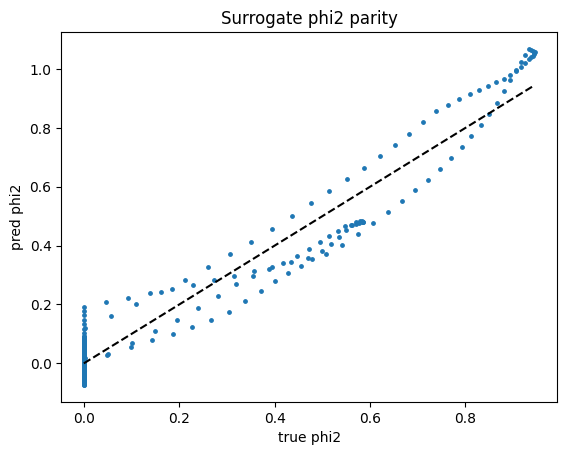


Epoch 0: lam_phys_current=0.000000
Epoch 1/200
543/543 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6775 - phase_accuracy: 0.8221 - phase_loss: 0.3854 - phi2_loss: 0.0986 - phys_res_loss: 0.0974 - rho_loss: 0.0959 - val_loss: 0.5615 - val_phase_accuracy: 0.7774 - val_phase_loss: 0.4380 - val_phi2_loss: 0.0414 - val_phys_res_loss: 0.0445 - val_rho_loss: 0.0388 - learning_rate: 0.0010
Epoch 1: lam_phys_current=0.000000
Epoch 2/200
543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2764 - phase_accuracy: 0.9187 - phase_loss: 0.1937 - phi2_loss: 0.0356 - phys_res_loss: 0.0349 - rho_loss: 0.0121 - val_loss: 0.3239 - val_phase_accuracy: 0.8676 - val_phase_loss: 0.2473 - val_phi2_loss: 0.0244 - val_phys_res_loss: 0.0262 - val_rho_loss: 0.0270 - learning_rate: 0.0010
Epoch 2: lam_phys_current=0.000000
Epoch 3/200
543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1463 - phase_accuracy: 0.9689 - phase_loss: 0.1084 - phi2_loss: 0.0151 - phys_res_loss: 0.0146 - rho_loss: 0.0083 - val_loss: 0.1817 

In [3]:
# --- 1) Load data ---
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# # Load dataset
# df = reduced_df

print(df)

# Features and targets
X = df[["Ubar","Mubar"]].values.astype(np.float32)
y = {
    "phase": df["Phase"].values.astype(np.float32),
    "phi2": df["Phi2"].values.astype(np.float32),
    "rho": df["Density"].values.astype(np.float32),
}

# --- 2) Train surrogate model ---
def build_surrogate(hidden=(128,64)):
    inp = keras.Input(shape=(2,))
    x = inp
    for h in hidden:
        x = layers.Dense(h, activation="relu")(x)
    out = layers.Dense(2, activation="linear")(x)   # [phi2, rho]
    m = keras.Model(inp, out)
    m.compile(optimizer="adam", loss="mse")
    return m

X_surr = df[["Ubar","Mubar"]].values.astype(np.float32)
y_surr = df[["Phi2","Density"]].values.astype(np.float32)

surrogate = build_surrogate()
surrogate.fit(
    X_surr, y_surr,
    epochs=200, batch_size=512,
    validation_split=0.15, verbose=1
)

# Surrogate validation
from sklearn.metrics import mean_squared_error, mean_absolute_error
X_val = X_surr[-500:]   # or better: shuffle and split properly
y_val = y_surr[-500:]
y_pred = surrogate.predict(X_val)
print("Surrogate MSE:", mean_squared_error(y_val, y_pred))
print("Surrogate MAE:", mean_absolute_error(y_val, y_pred))

# parity plot
import matplotlib.pyplot as plt
plt.scatter(y_val[:,0], y_pred[:,0], s=6); plt.xlabel("true phi2"); plt.ylabel("pred phi2"); plt.title("Surrogate phi2 parity")
plt.plot([y_val[:,0].min(), y_val[:,0].max()],[y_val[:,0].min(), y_val[:,0].max()], 'k--'); plt.show()


# Save & reload in new Keras format
surrogate.save("surrogate_phi_rho.keras")
surrogate = keras.models.load_model("surrogate_phi_rho.keras", compile=False)
surrogate.trainable = False   # freeze surrogate

# --- 3) PINN with surrogate residual ---
def make_pinn_with_surrogate(hidden=(128,64), lam_phase=1.0, lam_phys=1.0):
    inp = keras.Input(shape=(2,), name="input")   # [Ubar, Mubar]
    lam_phys_var = tf.Variable(lam_phys, trainable=False, dtype=tf.float32, name="lam_phys")
    x = inp
    for h in hidden:
        x = layers.Dense(h, activation="tanh")(x)

    phase_out = layers.Dense(1, activation="sigmoid", name="phase")(x)
    phi_out   = layers.Dense(1, activation="relu", name="phi2")(x)
    rho_out   = layers.Dense(1, activation="relu", name="rho")(x)

    # Physics residual via surrogate
    def phys_residual(inputs):
        UMb, phi_pred = inputs[0], inputs[1]
        s = surrogate(UMb)                  # surrogate predictions [phi2, rho]
        s_phi = tf.expand_dims(s[:, 0], -1) # only phi2
        return phi_pred - s_phi

    phys_out = layers.Lambda(
        lambda t: phys_residual([t[0], t[1]]),
        name="phys_res"
    )([inp, phi_out])

    model = keras.Model(inputs=inp, outputs=[phase_out, phi_out, rho_out, phys_out])

    losses = {
        "phase": "binary_crossentropy",
        "phi2": "mse",
        "rho": "mse",
        "phys_res": lambda y_true, y_pred: lam_phys_var * tf.reduce_mean(tf.square(y_pred))
    }
    loss_weights = {"phase": lam_phase, "phi2": 1.0, "rho": 1.0, "phys_res": 1.0}

    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss=losses,
        loss_weights=loss_weights,
        metrics={"phase":"accuracy"}
    )
    model.lam_phys = lam_phys_var
    return model

pinn_surrogate = make_pinn_with_surrogate()

# --- 4) Train PINN ---
y_targets = {
    "phase": df["Phase"].values.reshape(-1,1).astype(np.float32),
    "phi2":  df["Phi2"].values.reshape(-1,1).astype(np.float32),
    "rho":   df["Density"].values.reshape(-1,1).astype(np.float32),
    "phys_res": np.zeros((len(df),1), dtype=np.float32)
}


def mc_predict(model, X, n=50):
    preds = []
    for _ in range(n):
        p = model(X, training=True)  # keep dropout active
        preds.append(p[0].numpy())   # phase output
    preds = np.stack(preds, axis=0)
    return preds.mean(0), preds.std(0)

    
ramp_cb = LambdaRamp(start_epoch=5, end_epoch=40, final_value=1.0)
history = pinn_surrogate.fit(
    X, y_targets,
    batch_size=256,
    epochs=200,
    validation_split=0.15,
    callbacks=[
        keras.callbacks.ReduceLROnPlateau(patience=8, factor=0.5),ramp_cb
        # keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True)
    ]
)



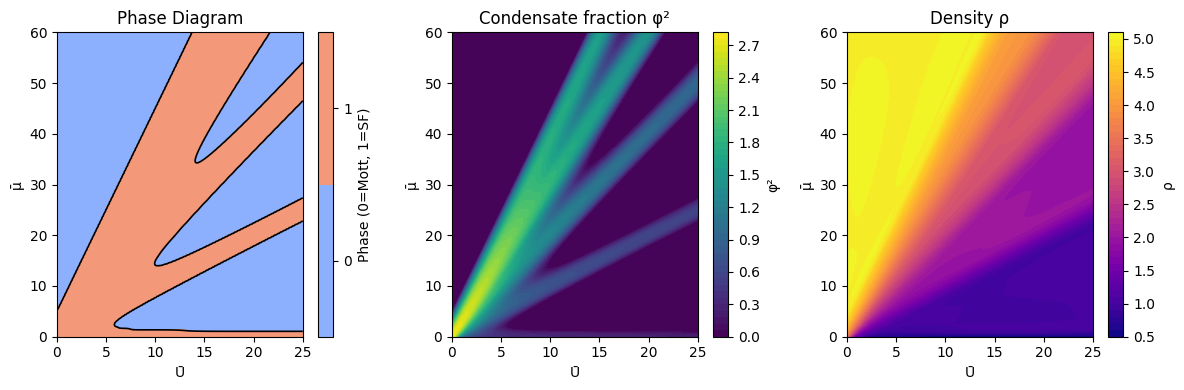

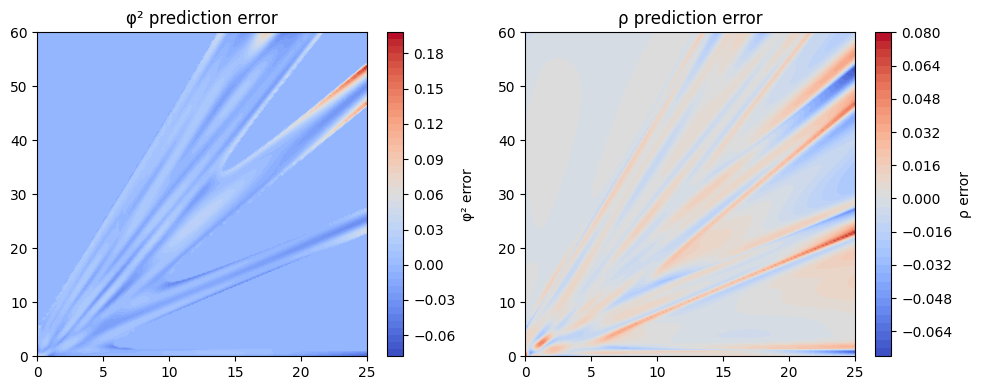

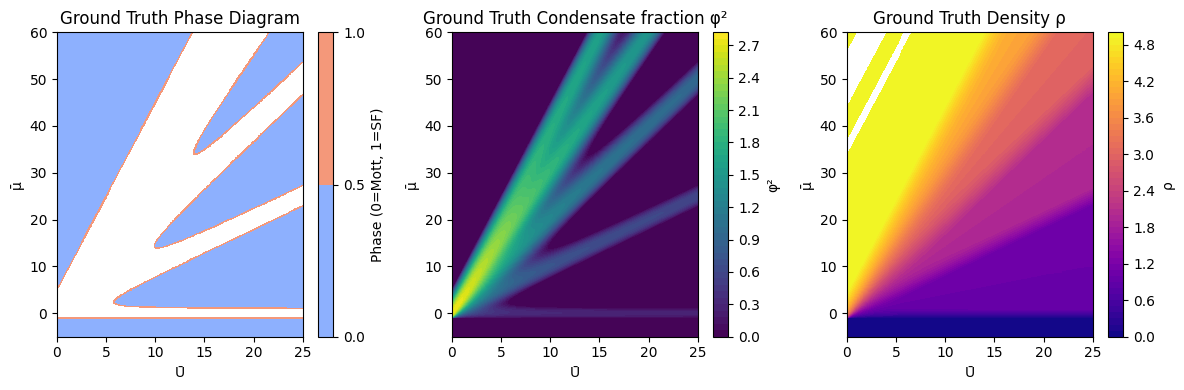


📊 Classification Report (Phase):
              precision    recall  f1-score   support

           0     0.9995    0.9977    0.9986     97450
           1     0.9967    0.9992    0.9979     65951

    accuracy                         0.9983    163401
   macro avg     0.9981    0.9985    0.9983    163401
weighted avg     0.9983    0.9983    0.9983    163401



C:\Users\DELL\AppData\Local\Temp\ipykernel_23724\2991935851.py:106: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_true_labels = df["Phase"].astype(int).ravel()


In [4]:
# --- 5) Phase diagram prediction ---
U_vals = np.linspace(0, 25, 200)   # Ū axis
mu_vals = np.linspace(0, 60, 200)  # μ̄ axis
UU, MU = np.meshgrid(U_vals, mu_vals)
X_grid = np.stack([UU.ravel(), MU.ravel()], axis=1).astype(np.float32)

# Predict → 4 outputs
y_pred_grid = pinn_surrogate.predict(X_grid, verbose=0)
phase_pred, phi2_pred, rho_pred, _ = y_pred_grid

phase_pred = phase_pred.reshape(UU.shape)
phi2_pred  = phi2_pred.reshape(UU.shape)
rho_pred   = rho_pred.reshape(UU.shape)
phase_pred_class = (phase_pred > 0.5).astype(int)

plt.figure(figsize=(12,4))

# --- Phase diagram ---
plt.subplot(1,3,1)
mappable = plt.contourf(UU, MU, phase_pred_class,
                        levels=[-0.5, 0.5, 1.5], cmap="coolwarm")
plt.colorbar(mappable, ticks=[0, 1], label="Phase (0=Mott, 1=SF)")
plt.contour(UU, MU, phase_pred, levels=[0.5], colors="k", linewidths=1.2)  # phase boundary
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Phase Diagram")

# --- φ² diagram ---
plt.subplot(1,3,2)
mappable = plt.contourf(UU, MU, phi2_pred, 50, cmap="viridis")
plt.colorbar(mappable, label="φ²")
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Condensate fraction φ²")

# --- ρ diagram ---
plt.subplot(1,3,3)
mappable = plt.contourf(UU, MU, rho_pred, 50, cmap="plasma")
plt.colorbar(mappable, label="ρ")
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Density ρ")

plt.tight_layout()
plt.show()

from scipy.interpolate import griddata

# Ground truth values
points = df[["Ubar","Mubar"]].values
phi2_true_interp = griddata(points, df["Phi2"].values, (UU, MU), method="linear")
rho_true_interp  = griddata(points, df["Density"].values, (UU, MU), method="linear")

# Compute errors on grid
phi2_err = phi2_pred - phi2_true_interp
rho_err  = rho_pred - rho_true_interp

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.contourf(UU, MU, phi2_err, 50, cmap="coolwarm")
plt.colorbar(label="φ² error")
plt.title("φ² prediction error")

plt.subplot(1,2,2)
plt.contourf(UU, MU, rho_err, 50, cmap="coolwarm")
plt.colorbar(label="ρ error")
plt.title("ρ prediction error")
plt.tight_layout(); plt.show()



# Ground truth plots from dataset
plt.figure(figsize=(12,4))

# 1) Phase diagram
plt.subplot(1,3,1)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Phase"], levels=1, cmap="coolwarm"
)
plt.colorbar(label="Phase (0=Mott, 1=SF)")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Phase Diagram")

# 2) Phi²
plt.subplot(1,3,2)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Phi2"], 50, cmap="viridis"
)
plt.colorbar(label="φ²")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Condensate fraction φ²")

# 3) Density
plt.subplot(1,3,3)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Density"], 50, cmap="plasma"
)
plt.colorbar(label="ρ")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Density ρ")

plt.tight_layout()
plt.show()


# --- 6) Classification report ---
y_pred_phase, y_pred_phi2, y_pred_rho, _ = pinn_surrogate.predict(X, verbose=0)
y_pred_labels = (y_pred_phase > 0.5).astype(int).ravel()
y_true_labels = df["Phase"].astype(int).ravel()

print("\n📊 Classification Report (Phase):")
print(classification_report(y_true_labels, y_pred_labels, digits=4))


In [6]:
# # --- 6) Classification report on FULL dataset ---
# df_full = pd.read_csv("phase_t1.0_U25.0-(0.1)_Mu60.0-(0.1).csv")
# df_full["Phase"] = df_full.apply(lambda row: label_phase(row["Density"], row["Phi2"]), axis=1)

# X_full = df_full[["Ubar","Mubar"]].values.astype(np.float32)
# y_true_full = df_full["Phase"].astype(int).ravel()

# # Predict with trained model
# y_pred_phase_full, _, _, _ = pinn_surrogate.predict(X_full, verbose=0)
# y_pred_labels_full = (y_pred_phase_full > 0.5).astype(int).ravel()

# from sklearn.metrics import classification_report
# print("\n📊 Classification Report (Phase, FULL dataset):")
# print(classification_report(y_true_full, y_pred_labels_full, digits=4))

In [ ]:
# # Add g = round(Density) as Mott index
# df["g"] = df["Density"].round().astype(int)

# # Now stratified sampling works
# df_balanced = (
#     df.groupby(["Phase","g"])
#       .apply(lambda x: x.sample(n=min(500, len(x)), random_state=42))
#       .reset_index(drop=True)
# )

# print(df_balanced["g"].value_counts())



In [ ]:
# # --- 1) Load data ---
# import numpy as np, pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.metrics import classification_report
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

# # Load dataset
# df = pd.read_csv("phase_t1.0_U25.0-(0.1)_Mu60.0-(0.1).csv")

# # Label phase: 1 = SF, 0 = MI
# df["Phase"] = (df["Phi2"] > 1e-6).astype(int)

# # Features and targets
# X = df[["Ubar","Mubar"]].values.astype(np.float32)
# y = {
#     "phase": df["Phase"].values.astype(np.float32),
#     "phi2": df["Phi2"].values.astype(np.float32),
#     "rho": df["Density"].values.astype(np.float32),
# }

# # --- 2) Train surrogate model ---
# def build_surrogate(hidden=(128,64)):
#     inp = keras.Input(shape=(2,))
#     x = inp
#     for h in hidden:
#         x = layers.Dense(h, activation="relu")(x)
#     out = layers.Dense(2, activation="linear")(x)   # [phi2, rho]
#     m = keras.Model(inp, out)
#     m.compile(optimizer="adam", loss="mse")
#     return m

# X_surr = df[["Ubar","Mubar"]].values.astype(np.float32)
# y_surr = df[["Phi2","Density"]].values.astype(np.float32)

# surrogate = build_surrogate()
# surrogate.fit(
#     X_surr, y_surr,
#     epochs=200, batch_size=512,
#     validation_split=0.15, verbose=1
# )

# # Surrogate validation
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# X_val = X_surr[-500:]   # or better: shuffle and split properly
# y_val = y_surr[-500:]
# y_pred = surrogate.predict(X_val)
# print("Surrogate MSE:", mean_squared_error(y_val, y_pred))
# print("Surrogate MAE:", mean_absolute_error(y_val, y_pred))

# # parity plot
# import matplotlib.pyplot as plt
# plt.scatter(y_val[:,0], y_pred[:,0], s=6); plt.xlabel("true phi2"); plt.ylabel("pred phi2"); plt.title("Surrogate phi2 parity")
# plt.plot([y_val[:,0].min(), y_val[:,0].max()],[y_val[:,0].min(), y_val[:,0].max()], 'k--'); plt.show()


# # Save & reload in new Keras format
# surrogate.save("surrogate_phi_rho.keras")
# surrogate = keras.models.load_model("surrogate_phi_rho.keras", compile=False)
# surrogate.trainable = False   # freeze surrogate

# # --- 3) PINN with surrogate residual ---
# def make_pinn_with_surrogate(hidden=(128,64), lam_phase=1.0, lam_phys=1.0):
#     inp = keras.Input(shape=(2,), name="input")   # [Ubar, Mubar]
#     lam_phys_var = tf.Variable(lam_phys, trainable=False, dtype=tf.float32, name="lam_phys")
#     x = inp
#     for h in hidden:
#         x = layers.Dense(h, activation="tanh")(x)

#     phase_out = layers.Dense(1, activation="sigmoid", name="phase")(x)
#     phi_out   = layers.Dense(1, activation="relu", name="phi2")(x)
#     rho_out   = layers.Dense(1, activation="relu", name="rho")(x)

#     # Physics residual via surrogate
#     def phys_residual(inputs):
#         UMb, phi_pred = inputs[0], inputs[1]
#         s = surrogate(UMb)                  # surrogate predictions [phi2, rho]
#         s_phi = tf.expand_dims(s[:, 0], -1) # only phi2
#         return phi_pred - s_phi

#     phys_out = layers.Lambda(
#         lambda t: phys_residual([t[0], t[1]]),
#         name="phys_res"
#     )([inp, phi_out])

#     model = keras.Model(inputs=inp, outputs=[phase_out, phi_out, rho_out, phys_out])

#     losses = {
#         "phase": "binary_crossentropy",
#         "phi2": "mse",
#         "rho": "mse",
#         "phys_res": lambda y_true, y_pred: lam_phys_var * tf.reduce_mean(tf.square(y_pred))
#     }
#     loss_weights = {"phase": lam_phase, "phi2": 1.0, "rho": 1.0, "phys_res": 1.0}

#     model.compile(
#         optimizer=keras.optimizers.Adam(1e-3),
#         loss=losses,
#         loss_weights=loss_weights,
#         metrics={"phase":"accuracy"}
#     )
#     model.lam_phys = lam_phys_var
#     return model

# pinn_surrogate = make_pinn_with_surrogate()

# # --- 4) Train PINN ---
# y_targets = {
#     "phase": df["Phase"].values.reshape(-1,1).astype(np.float32),
#     "phi2":  df["Phi2"].values.reshape(-1,1).astype(np.float32),
#     "rho":   df["Density"].values.reshape(-1,1).astype(np.float32),
#     "phys_res": np.zeros((len(df),1), dtype=np.float32)
# }


# def mc_predict(model, X, n=50):
#     preds = []
#     for _ in range(n):
#         p = model(X, training=True)  # keep dropout active
#         preds.append(p[0].numpy())   # phase output
#     preds = np.stack(preds, axis=0)
#     return preds.mean(0), preds.std(0)

    
# ramp_cb = LambdaRamp(start_epoch=5, end_epoch=40, final_value=1.0)
# history = pinn_surrogate.fit(
#     X, y_targets,
#     batch_size=256,
#     epochs=200,
#     validation_split=0.15,
#     callbacks=[
#         keras.callbacks.ReduceLROnPlateau(patience=8, factor=0.5),ramp_cb,
#         keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True)
#     ]
# )

# 26k dataset with reduced datset function ( function is bad )

In [7]:
import numpy as np
import pandas as pd

def make_reduced_df(df, num_points=200, transition_region=(4, 8), target_col="Phi2"):
    """
    Reduce dataset while keeping physics-important points.
    Returns a new DataFrame.
    """
    U_vals = df["Ubar"].values
    target = df[target_col].values
    N = len(df)

    keep_idx = []

    # 1. Extremes
    keep_idx.extend([0, N-1])

    # 2. Transition region
    transition_mask = (U_vals >= transition_region[0]) & (U_vals <= transition_region[1])
    keep_idx.extend(list(np.where(transition_mask)[0]))

    # 3. Curvature (based on Phi2 by default)
    dydU = np.gradient(target, U_vals)
    d2ydU2 = np.gradient(dydU, U_vals)
    high_curv_idx = np.argsort(np.abs(d2ydU2))[-10:]
    keep_idx.extend(list(high_curv_idx))

    # 4. Uniform subsample of the rest
    keep_idx = sorted(set(keep_idx))
    if len(keep_idx) < num_points:
        extra_idx = np.linspace(0, N-1, num_points - len(keep_idx), dtype=int)
        keep_idx.extend(list(extra_idx))

    keep_idx = sorted(set(keep_idx))

    # Build reduced df
    reduced_df = df.iloc[keep_idx].reset_index(drop=True)
    return reduced_df

# ---- Example usage ----
reduced_df = make_reduced_df(df, num_points=1000, transition_region=(4, 8))

print("Full dataset size:", len(df))
print("Reduced dataset size:", len(reduced_df))
reduced_df.head()

Full dataset size: 163401
Reduced dataset size: 26702


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_function_base_impl.py:1307: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_function_base_impl.py:1307: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_function_base_impl.py:1308: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_function_base_impl.py:1308: RuntimeWarning: invalid value encoun

,t,Ubar,Mubar,Density,Phi2,Energy,Iters,Phase
0,1.0,0.0,-5.0,1.048576e-14,1.048576e-14,2.097152e-13,8,0
1,1.0,4.0,-5.0,1.046584e-14,1.046584e-14,2.093168e-13,8,0
2,1.0,4.0,-4.9,1.505417e-14,1.505417e-14,2.876852e-13,8,0
3,1.0,4.0,-4.8,2.181686e-14,2.181686e-14,3.979394e-13,8,0
4,1.0,4.0,-4.7,3.186522e-14,3.186522e-14,5.541362e-13,8,0


         t  Ubar  Mubar       Density          Phi2        Energy  Iters  \
0      1.0   0.0   -5.0  1.048576e-14  1.048576e-14  2.097152e-13      8   
1      1.0   4.0   -5.0  1.046584e-14  1.046584e-14  2.093168e-13      8   
2      1.0   4.0   -4.9  1.505417e-14  1.505417e-14  2.876852e-13      8   
3      1.0   4.0   -4.8  2.181686e-14  2.181686e-14  3.979394e-13      8   
4      1.0   4.0   -4.7  3.186522e-14  3.186522e-14  5.541362e-13      8   
...    ...   ...    ...           ...           ...           ...    ...   
26697  1.0  25.0   59.6  3.000000e+00  8.530376e-13 -1.038000e+02     21   
26698  1.0  25.0   59.7  3.000000e+00  7.586920e-13 -1.041000e+02     21   
26699  1.0  25.0   59.8  3.000000e+00  6.791729e-13 -1.044000e+02     21   
26700  1.0  25.0   59.9  3.000000e+00  6.119027e-13 -1.047000e+02     21   
26701  1.0  25.0   60.0  3.000000e+00  5.548081e-13 -1.050000e+02     21   

       Phase  
0          0  
1          0  
2          0  
3          0  
4          0

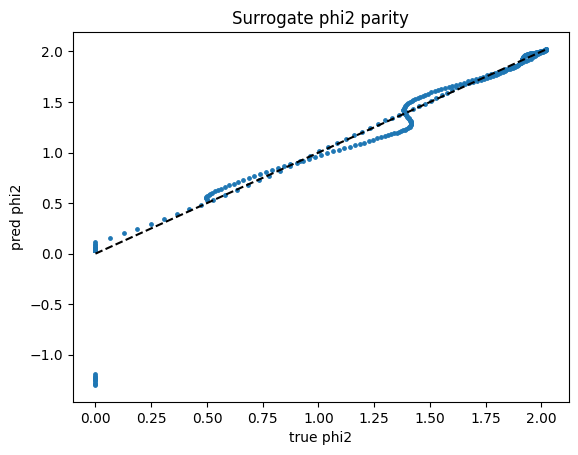

Epoch 0: lam_phys_current=0.000000
Epoch 1/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 17.3303 - phase_accuracy: 0.9126 - phase_loss: 0.2722 - phi2_loss: 0.1464 - phys_res_loss: 0.1459 - rho_loss: 16.7622 - val_loss: 15.2915 - val_phase_accuracy: 0.8959 - val_phase_loss: 0.2616 - val_phi2_loss: 0.0956 - val_phys_res_loss: 0.1217 - val_rho_loss: 15.0322 - learning_rate: 0.0010
Epoch 1: lam_phys_current=0.000000
Epoch 2/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6787 - phase_accuracy: 0.9317 - phase_loss: 0.1965 - phi2_loss: 0.0607 - phys_res_loss: 0.0605 - rho_loss: 9.3249 - val_loss: 0.5055 - val_phase_accuracy: 0.9064 - val_phase_loss: 0.2815 - val_phi2_loss: 0.0672 - val_phys_res_loss: 0.0869 - val_rho_loss: 0.0837 - learning_rate: 0.0010
Epoch 2: lam_phys_current=0.000000
Epoch 3/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2202 - phase_accuracy: 0.9666 - phase_loss: 0.1412 - phi2_loss: 0.0217 - phys_res_loss: 0.0215 - rho_loss: 0.0355 - val_loss: 0.3458 - v

In [8]:
# --- 1) Load data ---
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load dataset
df = reduced_df

print(df)

# Features and targets
X = df[["Ubar","Mubar"]].values.astype(np.float32)

y = {
    "phase": df["Phase"].values.astype(np.float32),
    "phi2": df["Phi2"].values.astype(np.float32),
    "rho": df["Density"].values.astype(np.float32),
}

# --- 2) Train surrogate model ---
def build_surrogate(hidden=(128,64)):
    inp = keras.Input(shape=(2,))
    x = inp
    for h in hidden:
        x = layers.Dense(h, activation="relu")(x)
    out = layers.Dense(2, activation="linear")(x)   # [phi2, rho]
    m = keras.Model(inp, out)
    m.compile(optimizer="adam", loss="mse")
    return m

X_surr = df[["Ubar","Mubar"]].values.astype(np.float32)
y_surr = df[["Phi2","Density"]].values.astype(np.float32)

surrogate = build_surrogate()
surrogate.fit(
    X_surr, y_surr,
    epochs=200, batch_size=512,
    validation_split=0.15, verbose=1
)

# Surrogate validation
from sklearn.metrics import mean_squared_error, mean_absolute_error
X_val = X_surr[-500:]   # or better: shuffle and split properly
y_val = y_surr[-500:]
y_pred = surrogate.predict(X_val)
print("Surrogate MSE:", mean_squared_error(y_val, y_pred))
print("Surrogate MAE:", mean_absolute_error(y_val, y_pred))

# parity plot
import matplotlib.pyplot as plt
plt.scatter(y_val[:,0], y_pred[:,0], s=6); plt.xlabel("true phi2"); plt.ylabel("pred phi2"); plt.title("Surrogate phi2 parity")
plt.plot([y_val[:,0].min(), y_val[:,0].max()],[y_val[:,0].min(), y_val[:,0].max()], 'k--'); plt.show()


# Save & reload in new Keras format
surrogate.save("surrogate_phi_rho.keras")
surrogate = keras.models.load_model("surrogate_phi_rho.keras", compile=False)
surrogate.trainable = False   # freeze surrogate

# --- 3) PINN with surrogate residual ---
def make_pinn_with_surrogate(hidden=(128,64), lam_phase=1.0, lam_phys=1.0):
    inp = keras.Input(shape=(2,), name="input")   # [Ubar, Mubar]
    lam_phys_var = tf.Variable(lam_phys, trainable=False, dtype=tf.float32, name="lam_phys")
    x = inp
    for h in hidden:
        x = layers.Dense(h, activation="tanh")(x)

    phase_out = layers.Dense(1, activation="sigmoid", name="phase")(x)
    phi_out   = layers.Dense(1, activation="relu", name="phi2")(x)
    rho_out   = layers.Dense(1, activation="relu", name="rho")(x)

    # Physics residual via surrogate
    def phys_residual(inputs):
        UMb, phi_pred = inputs[0], inputs[1]
        s = surrogate(UMb)                  # surrogate predictions [phi2, rho]
        s_phi = tf.expand_dims(s[:, 0], -1) # only phi2
        return phi_pred - s_phi

    phys_out = layers.Lambda(
        lambda t: phys_residual([t[0], t[1]]),
        name="phys_res"
    )([inp, phi_out])

    model = keras.Model(inputs=inp, outputs=[phase_out, phi_out, rho_out, phys_out])

    losses = {
        "phase": "binary_crossentropy",
        "phi2": "mse",
        "rho": "mse",
        "phys_res": lambda y_true, y_pred: lam_phys_var * tf.reduce_mean(tf.square(y_pred))
    }
    loss_weights = {"phase": lam_phase, "phi2": 1.0, "rho": 1.0, "phys_res": 1.0}

    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss=losses,
        loss_weights=loss_weights,
        metrics={"phase":"accuracy"}
    )
    model.lam_phys = lam_phys_var
    return model

pinn_surrogate = make_pinn_with_surrogate()

# --- 4) Train PINN ---
y_targets = {
    "phase": df["Phase"].values.reshape(-1,1).astype(np.float32),
    "phi2":  df["Phi2"].values.reshape(-1,1).astype(np.float32),
    "rho":   df["Density"].values.reshape(-1,1).astype(np.float32),
    "phys_res": np.zeros((len(df),1), dtype=np.float32)
}


def mc_predict(model, X, n=50):
    preds = []
    for _ in range(n):
        p = model(X, training=True)  # keep dropout active
        preds.append(p[0].numpy())   # phase output
    preds = np.stack(preds, axis=0)
    return preds.mean(0), preds.std(0)

    
ramp_cb = LambdaRamp(start_epoch=5, end_epoch=40, final_value=1.0)
history = pinn_surrogate.fit(
    X, y_targets,
    batch_size=256,
    epochs=200,
    validation_split=0.15,
    callbacks=[
        keras.callbacks.ReduceLROnPlateau(patience=8, factor=0.5),ramp_cb
        # keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True)
    ]
)

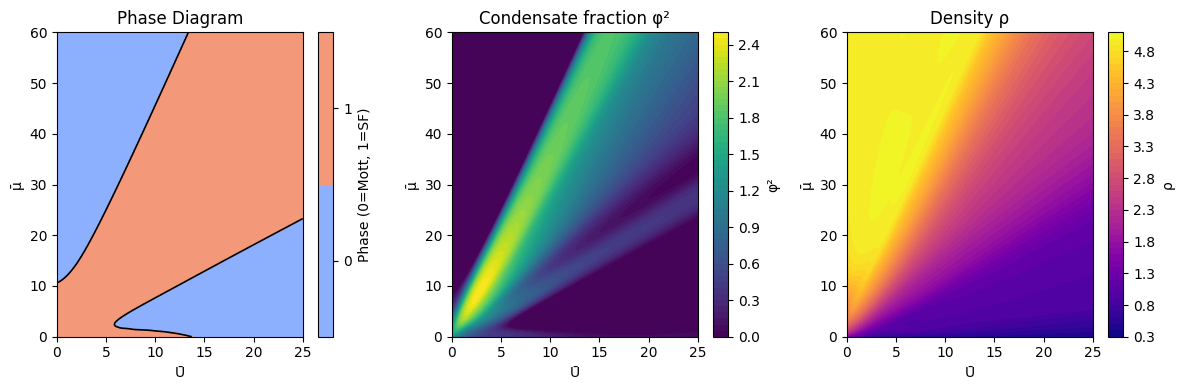

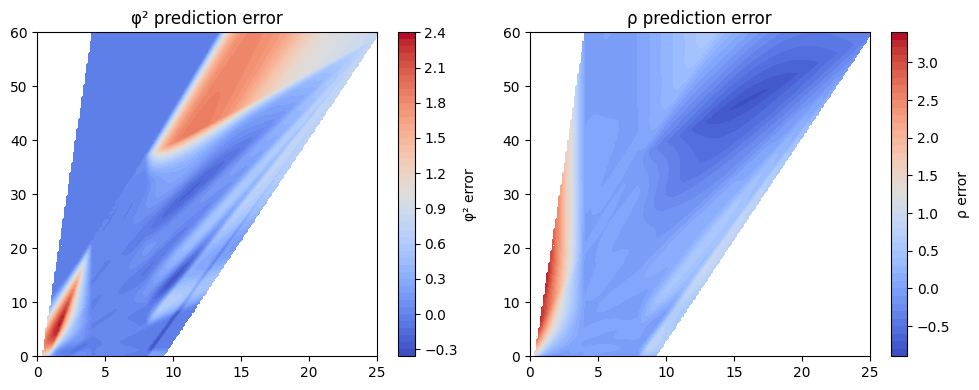

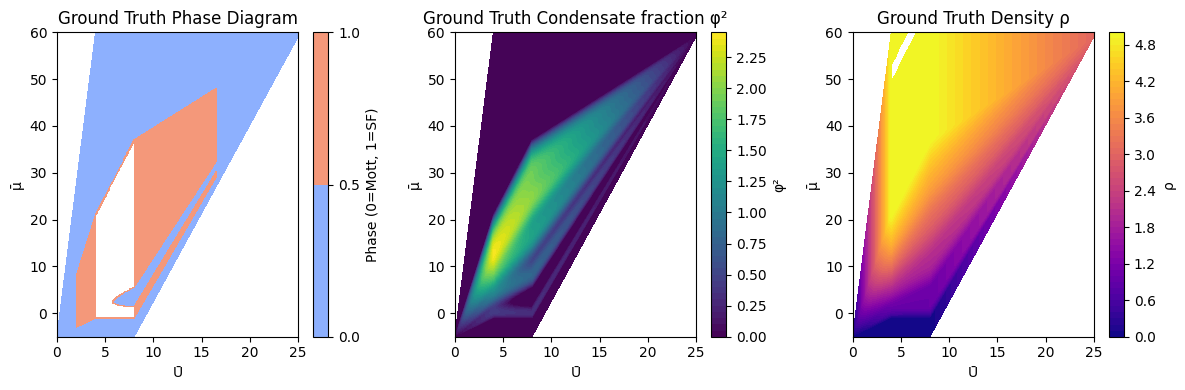


📊 Classification Report (Phase):
              precision    recall  f1-score   support

           0     0.9996    0.9979    0.9988     14940
           1     0.9974    0.9995    0.9984     11762

    accuracy                         0.9986     26702
   macro avg     0.9985    0.9987    0.9986     26702
weighted avg     0.9986    0.9986    0.9986     26702



C:\Users\DELL\AppData\Local\Temp\ipykernel_23724\2991935851.py:106: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_true_labels = df["Phase"].astype(int).ravel()


In [9]:
# --- 5) Phase diagram prediction ---
U_vals = np.linspace(0, 25, 200)   # Ū axis
mu_vals = np.linspace(0, 60, 200)  # μ̄ axis
UU, MU = np.meshgrid(U_vals, mu_vals)
X_grid = np.stack([UU.ravel(), MU.ravel()], axis=1).astype(np.float32)

# Predict → 4 outputs
y_pred_grid = pinn_surrogate.predict(X_grid, verbose=0)
phase_pred, phi2_pred, rho_pred, _ = y_pred_grid

phase_pred = phase_pred.reshape(UU.shape)
phi2_pred  = phi2_pred.reshape(UU.shape)
rho_pred   = rho_pred.reshape(UU.shape)
phase_pred_class = (phase_pred > 0.5).astype(int)

plt.figure(figsize=(12,4))

# --- Phase diagram ---
plt.subplot(1,3,1)
mappable = plt.contourf(UU, MU, phase_pred_class,
                        levels=[-0.5, 0.5, 1.5], cmap="coolwarm")
plt.colorbar(mappable, ticks=[0, 1], label="Phase (0=Mott, 1=SF)")
plt.contour(UU, MU, phase_pred, levels=[0.5], colors="k", linewidths=1.2)  # phase boundary
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Phase Diagram")

# --- φ² diagram ---
plt.subplot(1,3,2)
mappable = plt.contourf(UU, MU, phi2_pred, 50, cmap="viridis")
plt.colorbar(mappable, label="φ²")
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Condensate fraction φ²")

# --- ρ diagram ---
plt.subplot(1,3,3)
mappable = plt.contourf(UU, MU, rho_pred, 50, cmap="plasma")
plt.colorbar(mappable, label="ρ")
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Density ρ")

plt.tight_layout()
plt.show()

from scipy.interpolate import griddata

# Ground truth values
points = df[["Ubar","Mubar"]].values
phi2_true_interp = griddata(points, df["Phi2"].values, (UU, MU), method="linear")
rho_true_interp  = griddata(points, df["Density"].values, (UU, MU), method="linear")

# Compute errors on grid
phi2_err = phi2_pred - phi2_true_interp
rho_err  = rho_pred - rho_true_interp

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.contourf(UU, MU, phi2_err, 50, cmap="coolwarm")
plt.colorbar(label="φ² error")
plt.title("φ² prediction error")

plt.subplot(1,2,2)
plt.contourf(UU, MU, rho_err, 50, cmap="coolwarm")
plt.colorbar(label="ρ error")
plt.title("ρ prediction error")
plt.tight_layout(); plt.show()



# Ground truth plots from dataset
plt.figure(figsize=(12,4))

# 1) Phase diagram
plt.subplot(1,3,1)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Phase"], levels=1, cmap="coolwarm"
)
plt.colorbar(label="Phase (0=Mott, 1=SF)")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Phase Diagram")

# 2) Phi²
plt.subplot(1,3,2)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Phi2"], 50, cmap="viridis"
)
plt.colorbar(label="φ²")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Condensate fraction φ²")

# 3) Density
plt.subplot(1,3,3)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Density"], 50, cmap="plasma"
)
plt.colorbar(label="ρ")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Density ρ")

plt.tight_layout()
plt.show()


# --- 6) Classification report ---
y_pred_phase, y_pred_phi2, y_pred_rho, _ = pinn_surrogate.predict(X, verbose=0)
y_pred_labels = (y_pred_phase > 0.5).astype(int).ravel()
y_true_labels = df["Phase"].astype(int).ravel()

print("\n📊 Classification Report (Phase):")
print(classification_report(y_true_labels, y_pred_labels, digits=4))


# 4k dataset

          t  Ubar  Mubar       Density          Phi2        Energy  Iters  \
0       1.0   0.0   -5.0  1.048576e-14  1.048576e-14  2.097152e-13      8   
1       1.0   0.0   -4.9  1.508449e-14  1.508449e-14  2.882646e-13      8   
2       1.0   0.0   -4.8  2.186340e-14  2.186340e-14  3.987884e-13      8   
3       1.0   0.0   -4.7  3.193733e-14  3.193733e-14  5.553901e-13      8   
4       1.0   0.0   -4.6  4.703477e-14  4.703477e-14  7.788958e-13      8   
...     ...   ...    ...           ...           ...           ...    ...   
163396  1.0  25.0   59.6  3.000000e+00  8.530376e-13 -1.038000e+02     21   
163397  1.0  25.0   59.7  3.000000e+00  7.586920e-13 -1.041000e+02     21   
163398  1.0  25.0   59.8  3.000000e+00  6.791729e-13 -1.044000e+02     21   
163399  1.0  25.0   59.9  3.000000e+00  6.119027e-13 -1.047000e+02     21   
163400  1.0  25.0   60.0  3.000000e+00  5.548081e-13 -1.050000e+02     21   

        Phase  
0           0  
1           0  
2           0  
3          

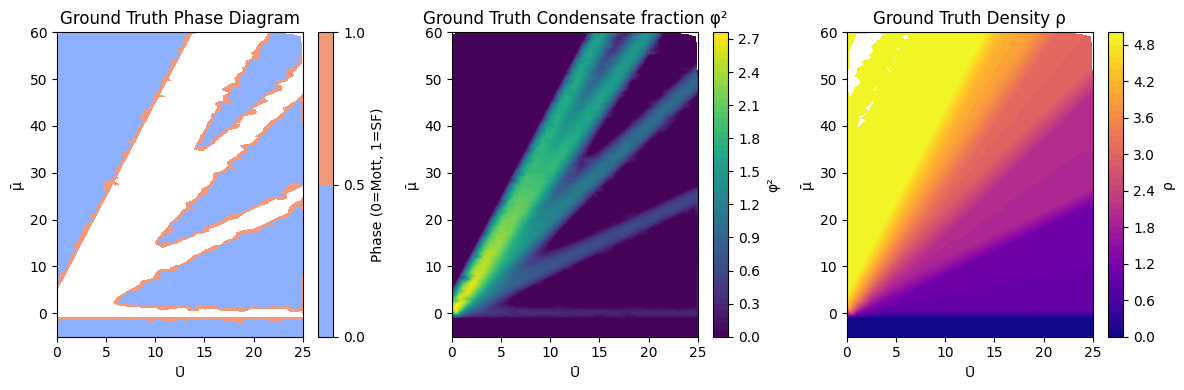

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap

import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from pytorch_tabnet.tab_model import TabNetClassifier


# Label: 1 = Superfluid, 0 = Mott
def label_phase(rho, phi2, tol_rho=1e-3, tol_phi=1e-6):
    """
    Classify phase:
    - Mott insulator if (rho ~ integer) and (phi^2 ~ 0).
    - Superfluid otherwise.
    """
    is_integer_rho = np.isclose(rho, np.round(rho), atol=tol_rho)
    is_zero_phi = phi2 < tol_phi
    
    if is_integer_rho and is_zero_phi:
        return 0  # Mott
    else:
        return 1  # Superfluid

        
# # ---------- 1) Load and label ----------
# df = pd.read_csv("phase_t1.0_U25.0-(0.1)_Mu60.0-(0.1).csv")

# # Label: 1 = Superfluid, 0 = Mott
# df["Phase"] = (df["Phi2"] > 1e-6).astype(int)

# # Features and target: **only** Ubar, Mubar
# X = df[["Ubar", "Mubar"]].copy()
# y = df["Phase"].copy()

# # Train/test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.25, random_state=42,
#     stratify=y
# )


# # Apply physics-based labeling
# df["Phase"] = df.apply(lambda row: label_phase(row["Density"], row["Phi2"]), axis=1)

# # Features and target: **only** Ubar, Mubar
# X = df[["Ubar", "Mubar"]].copy()
# y = df["Phase"].copy()

# # Train/test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.25, random_state=42,
#     stratify=y
# )

# ---------- 1) Load and label ----------
df = pd.read_csv("phase_t1.0_U25.0-(0.1)_Mu60.0-(0.1).csv")

# Apply physics-based labeling (optional, but consistent)
df["Phase"] = df.apply(lambda row: label_phase(row["Density"], row["Phi2"]), axis=1)




# --- pick deep MI (phi2 ≈ 0, density ~ integer) ---



df_MI = df[
    (df["Phi2"] < 1e-8) &
    (np.isclose(df["Density"], np.round(df["Density"]), atol=1e-3))
]

# --- pick deep SF (large phi2) ---
df_SF = df[df["Phi2"] > 1e-2]

# --- pick boundary (ambiguous region) ---
df_boundary = df[
    (df["Phi2"] > 1e-6) & (df["Phi2"] < 1e-2)
]

# ------------------------------
# Smart sampling strategy
# ------------------------------
n_MI = min(2000, len(df_MI))             # cap deep MI
n_SF = min(2000, len(df_SF))             # cap deep SF
n_boundary = min(6000, len(df_boundary)) # oversample boundary

df_reduced = pd.concat([
    df_MI.sample(n_MI, random_state=42),
    df_SF.sample(n_SF, random_state=42),
    df_boundary.sample(n_boundary, random_state=42)
])
print(df)
df_reduced = df_reduced.reset_index(drop=True)
# Use reduced dataset
df = df_reduced.reset_index(drop=True)
print(df)


print("Reduced dataset summary:")
print(df_reduced["Phase"].value_counts())

# Ground truth plots from dataset
plt.figure(figsize=(12,4))

# 1) Phase diagram
plt.subplot(1,3,1)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Phase"], levels=1, cmap="coolwarm"
)
plt.colorbar(label="Phase (0=Mott, 1=SF)")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Phase Diagram")

# 2) Phi²
plt.subplot(1,3,2)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Phi2"], 50, cmap="viridis"
)
plt.colorbar(label="φ²")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Condensate fraction φ²")

# 3) Density
plt.subplot(1,3,3)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Density"], 50, cmap="plasma"
)
plt.colorbar(label="ρ")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Density ρ")

plt.tight_layout()
plt.show()


        t  Ubar  Mubar       Density          Phi2        Energy  Iters  Phase
0     1.0  24.4   13.4  1.000000e+00  6.034134e-14 -1.340000e+01      9      0
1     1.0  16.0   -1.1  8.624612e-11  8.624612e-11  9.487073e-12    101      0
2     1.0  22.4    6.0  1.000000e+00  5.328648e-14 -6.000000e+00     10      0
3     1.0  14.2   22.4  2.000000e+00  6.649626e-12 -3.060000e+01     37      0
4     1.0  22.0    7.5  1.000000e+00  1.363996e-14 -7.500000e+00     10      0
...   ...   ...    ...           ...           ...           ...    ...    ...
4679  1.0   3.6   -1.0  8.456767e-05  8.456471e-05  4.598585e-09   4589      1
4680  1.0   5.3   26.2  4.999955e+00  2.254263e-04 -7.800000e+01   7465      1
4681  1.0  10.9   17.5  2.000244e+00  2.100670e-03 -2.410000e+01   2451      1
4682  1.0  16.3   -1.0  6.803388e-05  6.803021e-05  4.123775e-09   4118      1
4683  1.0   5.1   25.4  4.999955e+00  2.261209e-04 -7.600000e+01   7477      1

[4684 rows x 8 columns]
Epoch 1/200
8/8 ━━━━━━━━━━━

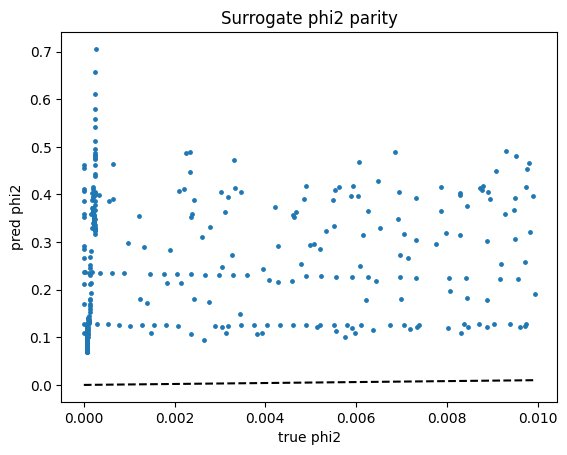

Epoch 0: lam_phys_current=0.000000
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 3.0199 - phase_accuracy: 0.5587 - phase_loss: 0.6976 - phi2_loss: 0.4573 - phys_res_loss: 0.4211 - rho_loss: 1.3976 - val_loss: 1.2586 - val_phase_accuracy: 0.3257 - val_phase_loss: 0.7204 - val_phi2_loss: 0.1888 - val_phys_res_loss: 0.0569 - val_rho_loss: 0.2912 - learning_rate: 0.0010
Epoch 1: lam_phys_current=0.000000
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4617 - phase_accuracy: 0.6581 - phase_loss: 0.6334 - phi2_loss: 0.3199 - phys_res_loss: 0.2832 - rho_loss: 0.2246 - val_loss: 1.3467 - val_phase_accuracy: 0.4666 - val_phase_loss: 0.8526 - val_phi2_loss: 0.2308 - val_phys_res_loss: 0.0730 - val_rho_loss: 0.1917 - learning_rate: 0.0010
Epoch 2: lam_phys_current=0.000000
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1740 - phase_accuracy: 0.7450 - phase_loss: 0.5968 - phi2_loss: 0.2389 - phys_res_loss: 0.1978 - rho_loss: 0.1366 - val_loss: 1.4174 - val_

In [11]:
# --- 1) Load data ---
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# # Load dataset
# df = reduced_df

print(df)

# Features and targets
X = df[["Ubar","Mubar"]].values.astype(np.float32)
y = {
    "phase": df["Phase"].values.astype(np.float32),
    "phi2": df["Phi2"].values.astype(np.float32),
    "rho": df["Density"].values.astype(np.float32),
}

# --- 2) Train surrogate model ---
def build_surrogate(hidden=(128,64)):
    inp = keras.Input(shape=(2,))
    x = inp
    for h in hidden:
        x = layers.Dense(h, activation="relu")(x)
    out = layers.Dense(2, activation="linear")(x)   # [phi2, rho]
    m = keras.Model(inp, out)
    m.compile(optimizer="adam", loss="mse")
    return m

X_surr = df[["Ubar","Mubar"]].values.astype(np.float32)
y_surr = df[["Phi2","Density"]].values.astype(np.float32)

surrogate = build_surrogate()
surrogate.fit(
    X_surr, y_surr,
    epochs=200, batch_size=512,
    validation_split=0.15, verbose=1
)

# Surrogate validation
from sklearn.metrics import mean_squared_error, mean_absolute_error
X_val = X_surr[-500:]   # or better: shuffle and split properly
y_val = y_surr[-500:]
y_pred = surrogate.predict(X_val)
print("Surrogate MSE:", mean_squared_error(y_val, y_pred))
print("Surrogate MAE:", mean_absolute_error(y_val, y_pred))

# parity plot
import matplotlib.pyplot as plt
plt.scatter(y_val[:,0], y_pred[:,0], s=6); plt.xlabel("true phi2"); plt.ylabel("pred phi2"); plt.title("Surrogate phi2 parity")
plt.plot([y_val[:,0].min(), y_val[:,0].max()],[y_val[:,0].min(), y_val[:,0].max()], 'k--'); plt.show()


# Save & reload in new Keras format
surrogate.save("surrogate_phi_rho.keras")
surrogate = keras.models.load_model("surrogate_phi_rho.keras", compile=False)
surrogate.trainable = False   # freeze surrogate

# --- 3) PINN with surrogate residual ---
def make_pinn_with_surrogate(hidden=(128,64), lam_phase=1.0, lam_phys=1.0):
    inp = keras.Input(shape=(2,), name="input")   # [Ubar, Mubar]
    lam_phys_var = tf.Variable(lam_phys, trainable=False, dtype=tf.float32, name="lam_phys")
    x = inp
    for h in hidden:
        x = layers.Dense(h, activation="tanh")(x)

    phase_out = layers.Dense(1, activation="sigmoid", name="phase")(x)
    phi_out   = layers.Dense(1, activation="relu", name="phi2")(x)
    rho_out   = layers.Dense(1, activation="relu", name="rho")(x)

    # Physics residual via surrogate
    def phys_residual(inputs):
        UMb, phi_pred = inputs[0], inputs[1]
        s = surrogate(UMb)                  # surrogate predictions [phi2, rho]
        s_phi = tf.expand_dims(s[:, 0], -1) # only phi2
        return phi_pred - s_phi

    phys_out = layers.Lambda(
        lambda t: phys_residual([t[0], t[1]]),
        name="phys_res"
    )([inp, phi_out])

    model = keras.Model(inputs=inp, outputs=[phase_out, phi_out, rho_out, phys_out])

    losses = {
        "phase": "binary_crossentropy",
        "phi2": "mse",
        "rho": "mse",
        "phys_res": lambda y_true, y_pred: lam_phys_var * tf.reduce_mean(tf.square(y_pred))
    }
    loss_weights = {"phase": lam_phase, "phi2": 1.0, "rho": 1.0, "phys_res": 1.0}

    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss=losses,
        loss_weights=loss_weights,
        metrics={"phase":"accuracy"}
    )
    model.lam_phys = lam_phys_var
    return model

pinn_surrogate = make_pinn_with_surrogate()

# --- 4) Train PINN ---
y_targets = {
    "phase": df["Phase"].values.reshape(-1,1).astype(np.float32),
    "phi2":  df["Phi2"].values.reshape(-1,1).astype(np.float32),
    "rho":   df["Density"].values.reshape(-1,1).astype(np.float32),
    "phys_res": np.zeros((len(df),1), dtype=np.float32)
}


def mc_predict(model, X, n=50):
    preds = []
    for _ in range(n):
        p = model(X, training=True)  # keep dropout active
        preds.append(p[0].numpy())   # phase output
    preds = np.stack(preds, axis=0)
    return preds.mean(0), preds.std(0)

    
ramp_cb = LambdaRamp(start_epoch=5, end_epoch=40, final_value=1.0)
history = pinn_surrogate.fit(
    X, y_targets,
    batch_size=256,
    epochs=200,
    validation_split=0.15,
    callbacks=[
        keras.callbacks.ReduceLROnPlateau(patience=8, factor=0.5),ramp_cb
        # keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True)
    ]
)




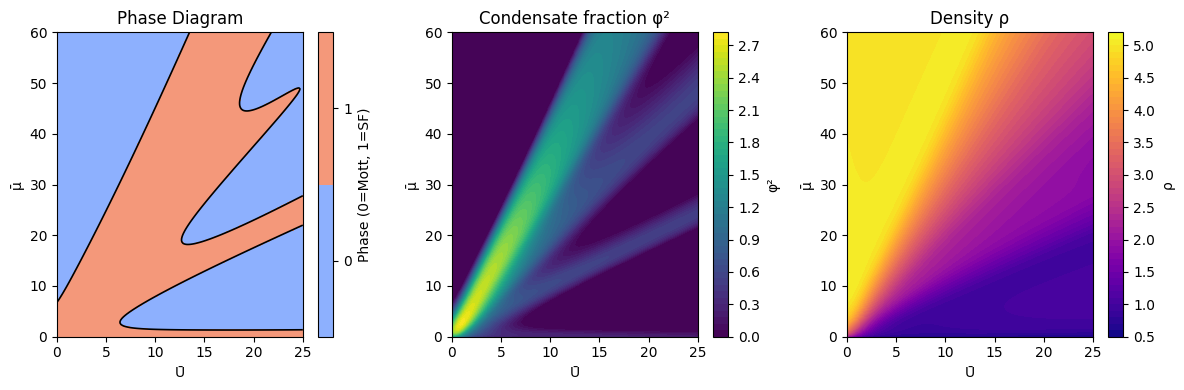

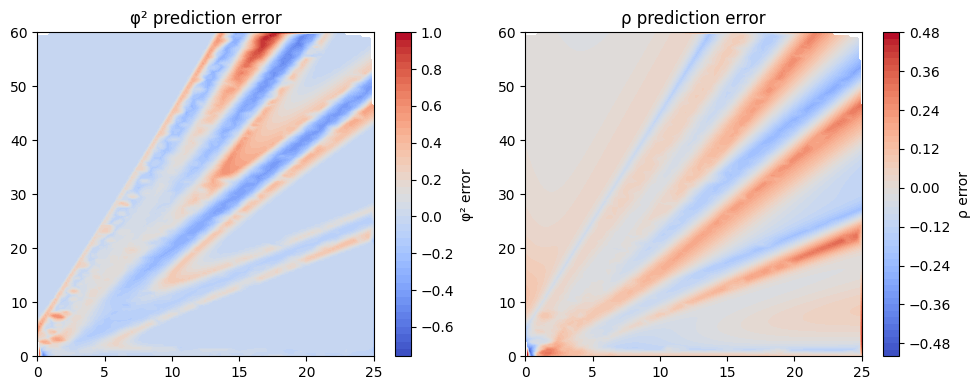

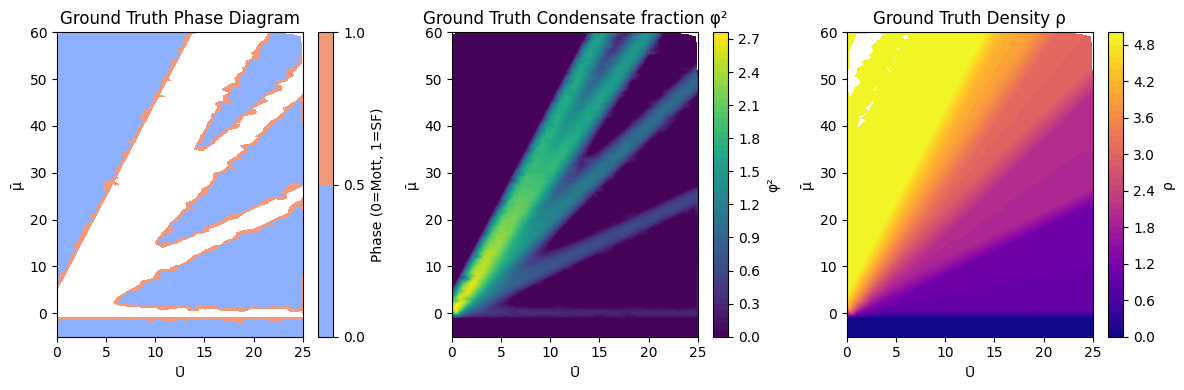

C:\Users\DELL\AppData\Local\Temp\ipykernel_23724\4170201337.py:106: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_true_labels = df["Phase"].astype(int).ravel()



📊 Classification Report (Phase):
              precision    recall  f1-score   support

           0     0.8673    0.9310    0.8980      2000
           1     0.9456    0.8938    0.9190      2684

    accuracy                         0.9097      4684
   macro avg     0.9064    0.9124    0.9085      4684
weighted avg     0.9122    0.9097    0.9100      4684



C:\Users\DELL\AppData\Local\Temp\ipykernel_23724\4170201337.py:117: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_true_full = df_full["Phase"].astype(int).ravel()



📊 Classification Report (Phase, FULL dataset):
              precision    recall  f1-score   support

           0     0.9742    0.9270    0.9500     97450
           1     0.8993    0.9637    0.9304     65951

    accuracy                         0.9418    163401
   macro avg     0.9368    0.9454    0.9402    163401
weighted avg     0.9440    0.9418    0.9421    163401



In [12]:
# --- 5) Phase diagram prediction ---
U_vals = np.linspace(0, 25, 200)   # Ū axis
mu_vals = np.linspace(0, 60, 200)  # μ̄ axis
UU, MU = np.meshgrid(U_vals, mu_vals)
X_grid = np.stack([UU.ravel(), MU.ravel()], axis=1).astype(np.float32)

# Predict → 4 outputs
y_pred_grid = pinn_surrogate.predict(X_grid, verbose=0)
phase_pred, phi2_pred, rho_pred, _ = y_pred_grid

phase_pred = phase_pred.reshape(UU.shape)
phi2_pred  = phi2_pred.reshape(UU.shape)
rho_pred   = rho_pred.reshape(UU.shape)
phase_pred_class = (phase_pred > 0.5).astype(int)

plt.figure(figsize=(12,4))

# --- Phase diagram ---
plt.subplot(1,3,1)
mappable = plt.contourf(UU, MU, phase_pred_class,
                        levels=[-0.5, 0.5, 1.5], cmap="coolwarm")
plt.colorbar(mappable, ticks=[0, 1], label="Phase (0=Mott, 1=SF)")
plt.contour(UU, MU, phase_pred, levels=[0.5], colors="k", linewidths=1.2)  # phase boundary
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Phase Diagram")

# --- φ² diagram ---
plt.subplot(1,3,2)
mappable = plt.contourf(UU, MU, phi2_pred, 50, cmap="viridis")
plt.colorbar(mappable, label="φ²")
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Condensate fraction φ²")

# --- ρ diagram ---
plt.subplot(1,3,3)
mappable = plt.contourf(UU, MU, rho_pred, 50, cmap="plasma")
plt.colorbar(mappable, label="ρ")
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Density ρ")

plt.tight_layout()
plt.show()

from scipy.interpolate import griddata

# Ground truth values
points = df[["Ubar","Mubar"]].values
phi2_true_interp = griddata(points, df["Phi2"].values, (UU, MU), method="linear")
rho_true_interp  = griddata(points, df["Density"].values, (UU, MU), method="linear")

# Compute errors on grid
phi2_err = phi2_pred - phi2_true_interp
rho_err  = rho_pred - rho_true_interp

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.contourf(UU, MU, phi2_err, 50, cmap="coolwarm")
plt.colorbar(label="φ² error")
plt.title("φ² prediction error")

plt.subplot(1,2,2)
plt.contourf(UU, MU, rho_err, 50, cmap="coolwarm")
plt.colorbar(label="ρ error")
plt.title("ρ prediction error")
plt.tight_layout(); plt.show()



# Ground truth plots from dataset
plt.figure(figsize=(12,4))

# 1) Phase diagram
plt.subplot(1,3,1)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Phase"], levels=1, cmap="coolwarm"
)
plt.colorbar(label="Phase (0=Mott, 1=SF)")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Phase Diagram")

# 2) Phi²
plt.subplot(1,3,2)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Phi2"], 50, cmap="viridis"
)
plt.colorbar(label="φ²")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Condensate fraction φ²")

# 3) Density
plt.subplot(1,3,3)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Density"], 50, cmap="plasma"
)
plt.colorbar(label="ρ")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Density ρ")

plt.tight_layout()
plt.show()


# --- 6) Classification report ---
y_pred_phase, y_pred_phi2, y_pred_rho, _ = pinn_surrogate.predict(X, verbose=0)
y_pred_labels = (y_pred_phase > 0.5).astype(int).ravel()
y_true_labels = df["Phase"].astype(int).ravel()

print("\n📊 Classification Report (Phase):")
print(classification_report(y_true_labels, y_pred_labels, digits=4))


# --- 6) Classification report on FULL dataset ---
df_full = pd.read_csv("phase_t1.0_U25.0-(0.1)_Mu60.0-(0.1).csv")
df_full["Phase"] = df_full.apply(lambda row: label_phase(row["Density"], row["Phi2"]), axis=1)

X_full = df_full[["Ubar","Mubar"]].values.astype(np.float32)
y_true_full = df_full["Phase"].astype(int).ravel()

# Predict with trained model
y_pred_phase_full, _, _, _ = pinn_surrogate.predict(X_full, verbose=0)
y_pred_labels_full = (y_pred_phase_full > 0.5).astype(int).ravel()

from sklearn.metrics import classification_report
print("\n📊 Classification Report (Phase, FULL dataset):")
print(classification_report(y_true_full, y_pred_labels_full, digits=4))


# 10k Dataset

          t  Ubar  Mubar       Density          Phi2        Energy  Iters  \
0       1.0   0.0   -5.0  1.048576e-14  1.048576e-14  2.097152e-13      8   
1       1.0   0.0   -4.9  1.508449e-14  1.508449e-14  2.882646e-13      8   
2       1.0   0.0   -4.8  2.186340e-14  2.186340e-14  3.987884e-13      8   
3       1.0   0.0   -4.7  3.193733e-14  3.193733e-14  5.553901e-13      8   
4       1.0   0.0   -4.6  4.703477e-14  4.703477e-14  7.788958e-13      8   
...     ...   ...    ...           ...           ...           ...    ...   
163396  1.0  25.0   59.6  3.000000e+00  8.530376e-13 -1.038000e+02     21   
163397  1.0  25.0   59.7  3.000000e+00  7.586920e-13 -1.041000e+02     21   
163398  1.0  25.0   59.8  3.000000e+00  6.791729e-13 -1.044000e+02     21   
163399  1.0  25.0   59.9  3.000000e+00  6.119027e-13 -1.047000e+02     21   
163400  1.0  25.0   60.0  3.000000e+00  5.548081e-13 -1.050000e+02     21   

        Phase  
0           0  
1           0  
2           0  
3          

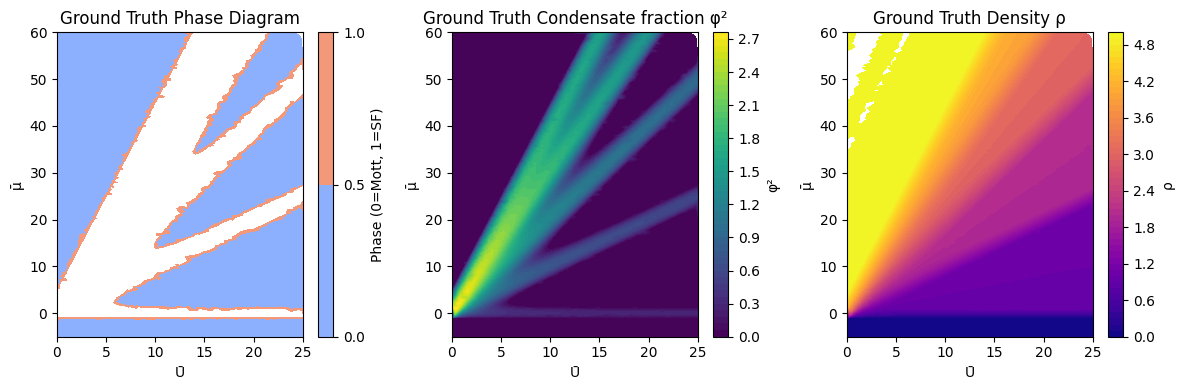

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap

import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from pytorch_tabnet.tab_model import TabNetClassifier


# Label: 1 = Superfluid, 0 = Mott
def label_phase(rho, phi2, tol_rho=1e-3, tol_phi=1e-6):
    """
    Classify phase:
    - Mott insulator if (rho ~ integer) and (phi^2 ~ 0).
    - Superfluid otherwise.
    """
    is_integer_rho = np.isclose(rho, np.round(rho), atol=tol_rho)
    is_zero_phi = phi2 < tol_phi
    
    if is_integer_rho and is_zero_phi:
        return 0  # Mott
    else:
        return 1  # Superfluid

        
# # ---------- 1) Load and label ----------
# df = pd.read_csv("phase_t1.0_U25.0-(0.1)_Mu60.0-(0.1).csv")

# # Label: 1 = Superfluid, 0 = Mott
# df["Phase"] = (df["Phi2"] > 1e-6).astype(int)

# # Features and target: **only** Ubar, Mubar
# X = df[["Ubar", "Mubar"]].copy()
# y = df["Phase"].copy()

# # Train/test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.25, random_state=42,
#     stratify=y
# )


# # Apply physics-based labeling
# df["Phase"] = df.apply(lambda row: label_phase(row["Density"], row["Phi2"]), axis=1)

# # Features and target: **only** Ubar, Mubar
# X = df[["Ubar", "Mubar"]].copy()
# y = df["Phase"].copy()

# # Train/test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.25, random_state=42,
#     stratify=y
# )

# ---------- 1) Load and label ----------
df = pd.read_csv("phase_t1.0_U25.0-(0.1)_Mu60.0-(0.1).csv")

# Apply physics-based labeling (optional, but consistent)
df["Phase"] = df.apply(lambda row: label_phase(row["Density"], row["Phi2"]), axis=1)




# --- pick deep MI (phi2 ≈ 0, density ~ integer) ---



df_MI = df[
    (df["Phi2"] < 1e-8) &
    (np.isclose(df["Density"], np.round(df["Density"]), atol=1e-3))
]

# --- pick deep SF (large phi2) ---
df_SF = df[df["Phi2"] > 1e-2]

# --- pick boundary (ambiguous region) ---
df_boundary = df[
    (df["Phi2"] > 1e-6) & (df["Phi2"] < 1e-2)
]

# ------------------------------
# Smart sampling strategy
# ------------------------------
# n_MI = min(2000, len(df_MI))             # cap deep MI
# n_SF = min(2000, len(df_SF))             # cap deep SF
# n_boundary = min(6000, len(df_boundary)) # oversample boundary

n_MI = min(5000, len(df_MI))
n_SF = min(5000, len(df_SF))
n_boundary = min(10000, len(df_boundary))


df_reduced = pd.concat([
    df_MI.sample(n_MI, random_state=42),
    df_SF.sample(n_SF, random_state=42),
    df_boundary.sample(n_boundary, random_state=42)
])
print(df)
df_reduced = df_reduced.reset_index(drop=True)
# Use reduced dataset
df = df_reduced.reset_index(drop=True)
print(df)


print("Reduced dataset summary:")
print(df_reduced["Phase"].value_counts())

# Ground truth plots from dataset
plt.figure(figsize=(12,4))

# 1) Phase diagram
plt.subplot(1,3,1)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Phase"], levels=1, cmap="coolwarm"
)
plt.colorbar(label="Phase (0=Mott, 1=SF)")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Phase Diagram")

# 2) Phi²
plt.subplot(1,3,2)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Phi2"], 50, cmap="viridis"
)
plt.colorbar(label="φ²")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Condensate fraction φ²")

# 3) Density
plt.subplot(1,3,3)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Density"], 50, cmap="plasma"
)
plt.colorbar(label="ρ")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Density ρ")

plt.tight_layout()
plt.show()


         t  Ubar  Mubar       Density          Phi2        Energy  Iters  \
0      1.0  24.4   13.4  1.000000e+00  6.034134e-14 -1.340000e+01      9   
1      1.0  16.0   -1.1  8.624612e-11  8.624612e-11  9.487073e-12    101   
2      1.0  22.4    6.0  1.000000e+00  5.328648e-14 -6.000000e+00     10   
3      1.0  14.2   22.4  2.000000e+00  6.649626e-12 -3.060000e+01     37   
4      1.0  22.0    7.5  1.000000e+00  1.363996e-14 -7.500000e+00     10   
...    ...   ...    ...           ...           ...           ...    ...   
10679  1.0   3.6   -1.0  8.456767e-05  8.456471e-05  4.598585e-09   4589   
10680  1.0   5.3   26.2  4.999955e+00  2.254263e-04 -7.800000e+01   7465   
10681  1.0  10.9   17.5  2.000244e+00  2.100670e-03 -2.410000e+01   2451   
10682  1.0  16.3   -1.0  6.803388e-05  6.803021e-05  4.123775e-09   4118   
10683  1.0   5.1   25.4  4.999955e+00  2.261209e-04 -7.600000e+01   7477   

       Phase  
0          0  
1          0  
2          0  
3          0  
4          0

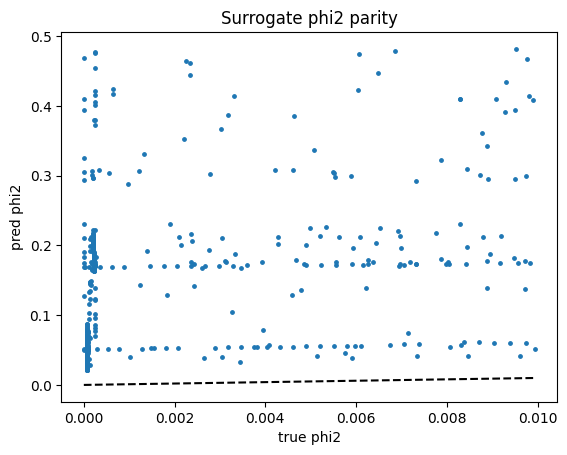

Epoch 0: lam_phys_current=0.000000
Epoch 1/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 12.8007 - phase_accuracy: 0.6652 - phase_loss: 0.6191 - phi2_loss: 0.6700 - phys_res_loss: 0.7175 - rho_loss: 10.8098 - val_loss: 10.7606 - val_phase_accuracy: 0.5190 - val_phase_loss: 0.8379 - val_phi2_loss: 0.6979 - val_phys_res_loss: 0.7737 - val_rho_loss: 8.1357 - learning_rate: 0.0010
Epoch 1: lam_phys_current=0.000000
Epoch 2/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.6497 - phase_accuracy: 0.8087 - phase_loss: 0.4903 - phi2_loss: 0.6591 - phys_res_loss: 0.7070 - rho_loss: 10.8073 - val_loss: 10.6949 - val_phase_accuracy: 0.5627 - val_phase_loss: 0.7746 - val_phi2_loss: 0.6979 - val_phys_res_loss: 0.7737 - val_rho_loss: 8.1357 - learning_rate: 0.0010
Epoch 2: lam_phys_current=0.000000
Epoch 3/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.5202 - phase_accuracy: 0.7642 - phase_loss: 0.5150 - phi2_loss: 0.6567 - phys_res_loss: 0.7043 - rho_loss: 6.5487 - val_loss: 3.1836 

In [14]:
# --- 1) Load data ---
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# # Load dataset
# df = reduced_df

print(df)

# Features and targets
X = df[["Ubar","Mubar"]].values.astype(np.float32)
y = {
    "phase": df["Phase"].values.astype(np.float32),
    "phi2": df["Phi2"].values.astype(np.float32),
    "rho": df["Density"].values.astype(np.float32),
}

# --- 2) Train surrogate model ---
def build_surrogate(hidden=(128,64)):
    inp = keras.Input(shape=(2,))
    x = inp
    for h in hidden:
        x = layers.Dense(h, activation="relu")(x)
    out = layers.Dense(2, activation="linear")(x)   # [phi2, rho]
    m = keras.Model(inp, out)
    m.compile(optimizer="adam", loss="mse")
    return m

X_surr = df[["Ubar","Mubar"]].values.astype(np.float32)
y_surr = df[["Phi2","Density"]].values.astype(np.float32)

surrogate = build_surrogate()
surrogate.fit(
    X_surr, y_surr,
    epochs=200, batch_size=512,
    validation_split=0.15, verbose=1
)

# Surrogate validation
from sklearn.metrics import mean_squared_error, mean_absolute_error
X_val = X_surr[-500:]   # or better: shuffle and split properly
y_val = y_surr[-500:]
y_pred = surrogate.predict(X_val)
print("Surrogate MSE:", mean_squared_error(y_val, y_pred))
print("Surrogate MAE:", mean_absolute_error(y_val, y_pred))

# parity plot
import matplotlib.pyplot as plt
plt.scatter(y_val[:,0], y_pred[:,0], s=6); plt.xlabel("true phi2"); plt.ylabel("pred phi2"); plt.title("Surrogate phi2 parity")
plt.plot([y_val[:,0].min(), y_val[:,0].max()],[y_val[:,0].min(), y_val[:,0].max()], 'k--'); plt.show()


# Save & reload in new Keras format
surrogate.save("surrogate_phi_rho.keras")
surrogate = keras.models.load_model("surrogate_phi_rho.keras", compile=False)
surrogate.trainable = False   # freeze surrogate

# --- 3) PINN with surrogate residual ---
def make_pinn_with_surrogate(hidden=(128,64), lam_phase=1.0, lam_phys=1.0):
    inp = keras.Input(shape=(2,), name="input")   # [Ubar, Mubar]
    lam_phys_var = tf.Variable(lam_phys, trainable=False, dtype=tf.float32, name="lam_phys")
    x = inp
    for h in hidden:
        x = layers.Dense(h, activation="tanh")(x)

    phase_out = layers.Dense(1, activation="sigmoid", name="phase")(x)
    phi_out   = layers.Dense(1, activation="relu", name="phi2")(x)
    rho_out   = layers.Dense(1, activation="relu", name="rho")(x)

    # Physics residual via surrogate
    def phys_residual(inputs):
        UMb, phi_pred = inputs[0], inputs[1]
        s = surrogate(UMb)                  # surrogate predictions [phi2, rho]
        s_phi = tf.expand_dims(s[:, 0], -1) # only phi2
        return phi_pred - s_phi

    phys_out = layers.Lambda(
        lambda t: phys_residual([t[0], t[1]]),
        name="phys_res"
    )([inp, phi_out])

    model = keras.Model(inputs=inp, outputs=[phase_out, phi_out, rho_out, phys_out])

    losses = {
        "phase": "binary_crossentropy",
        "phi2": "mse",
        "rho": "mse",
        "phys_res": lambda y_true, y_pred: lam_phys_var * tf.reduce_mean(tf.square(y_pred))
    }
    loss_weights = {"phase": lam_phase, "phi2": 1.0, "rho": 1.0, "phys_res": 1.0}

    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss=losses,
        loss_weights=loss_weights,
        metrics={"phase":"accuracy"}
    )
    model.lam_phys = lam_phys_var
    return model

pinn_surrogate = make_pinn_with_surrogate()

# --- 4) Train PINN ---
y_targets = {
    "phase": df["Phase"].values.reshape(-1,1).astype(np.float32),
    "phi2":  df["Phi2"].values.reshape(-1,1).astype(np.float32),
    "rho":   df["Density"].values.reshape(-1,1).astype(np.float32),
    "phys_res": np.zeros((len(df),1), dtype=np.float32)
}


def mc_predict(model, X, n=50):
    preds = []
    for _ in range(n):
        p = model(X, training=True)  # keep dropout active
        preds.append(p[0].numpy())   # phase output
    preds = np.stack(preds, axis=0)
    return preds.mean(0), preds.std(0)

    
ramp_cb = LambdaRamp(start_epoch=5, end_epoch=40, final_value=1.0)
history = pinn_surrogate.fit(
    X, y_targets,
    batch_size=256,
    epochs=200,
    validation_split=0.15,
    callbacks=[
        keras.callbacks.ReduceLROnPlateau(patience=8, factor=0.5),ramp_cb
        # keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True)
    ]
)



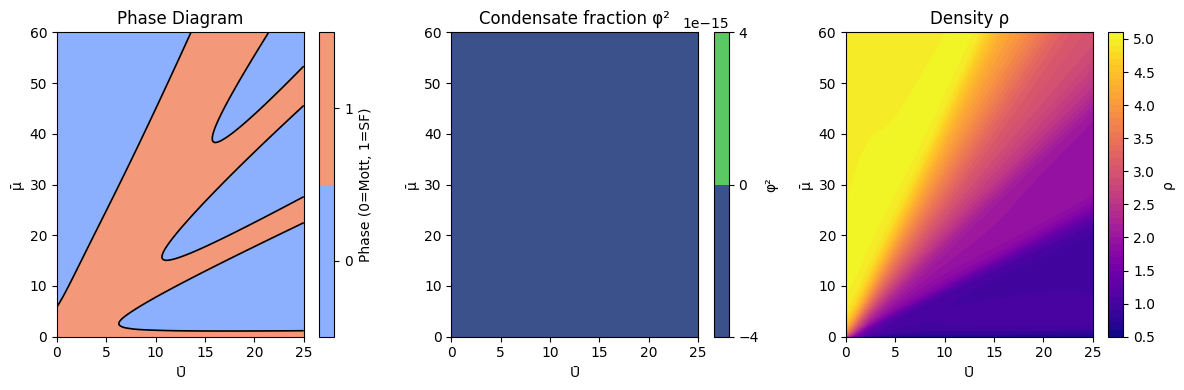

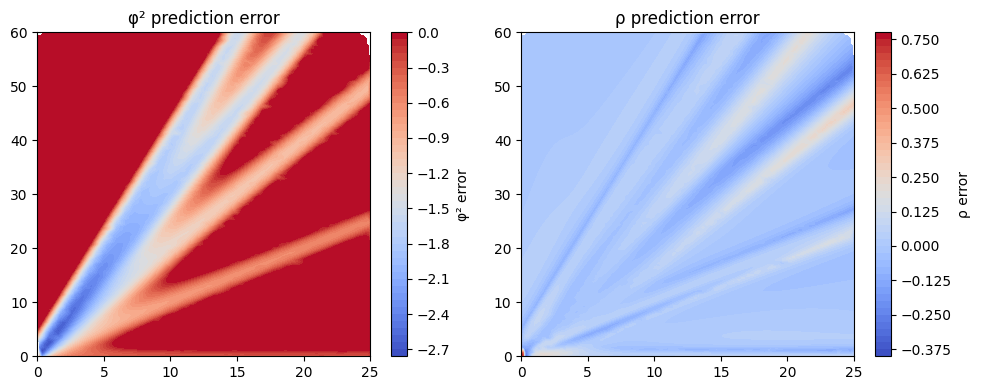

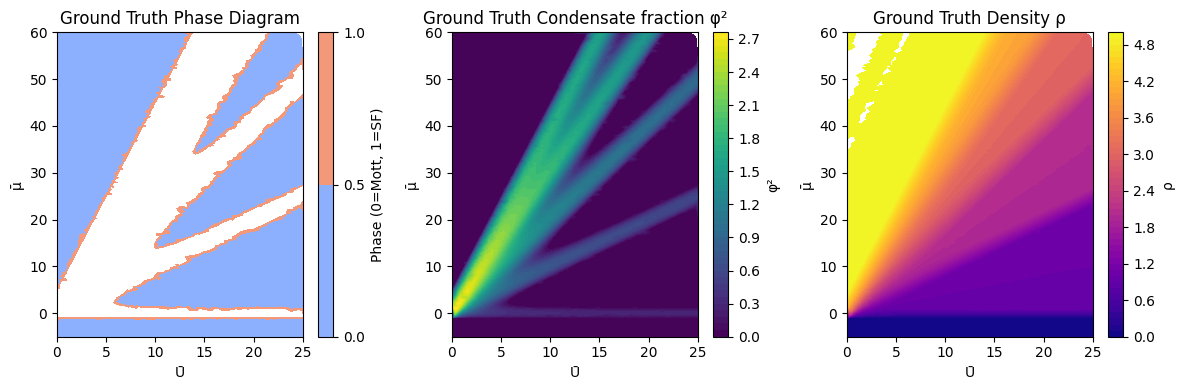


📊 Classification Report (Phase):
              precision    recall  f1-score   support

           0     0.9420    0.9778    0.9596      5000
           1     0.9798    0.9470    0.9631      5684

    accuracy                         0.9614     10684
   macro avg     0.9609    0.9624    0.9614     10684
weighted avg     0.9621    0.9614    0.9615     10684



C:\Users\DELL\AppData\Local\Temp\ipykernel_23724\2991935851.py:106: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_true_labels = df["Phase"].astype(int).ravel()


In [15]:
# --- 5) Phase diagram prediction ---
U_vals = np.linspace(0, 25, 200)   # Ū axis
mu_vals = np.linspace(0, 60, 200)  # μ̄ axis
UU, MU = np.meshgrid(U_vals, mu_vals)
X_grid = np.stack([UU.ravel(), MU.ravel()], axis=1).astype(np.float32)

# Predict → 4 outputs
y_pred_grid = pinn_surrogate.predict(X_grid, verbose=0)
phase_pred, phi2_pred, rho_pred, _ = y_pred_grid

phase_pred = phase_pred.reshape(UU.shape)
phi2_pred  = phi2_pred.reshape(UU.shape)
rho_pred   = rho_pred.reshape(UU.shape)
phase_pred_class = (phase_pred > 0.5).astype(int)

plt.figure(figsize=(12,4))

# --- Phase diagram ---
plt.subplot(1,3,1)
mappable = plt.contourf(UU, MU, phase_pred_class,
                        levels=[-0.5, 0.5, 1.5], cmap="coolwarm")
plt.colorbar(mappable, ticks=[0, 1], label="Phase (0=Mott, 1=SF)")
plt.contour(UU, MU, phase_pred, levels=[0.5], colors="k", linewidths=1.2)  # phase boundary
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Phase Diagram")

# --- φ² diagram ---
plt.subplot(1,3,2)
mappable = plt.contourf(UU, MU, phi2_pred, 50, cmap="viridis")
plt.colorbar(mappable, label="φ²")
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Condensate fraction φ²")

# --- ρ diagram ---
plt.subplot(1,3,3)
mappable = plt.contourf(UU, MU, rho_pred, 50, cmap="plasma")
plt.colorbar(mappable, label="ρ")
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Density ρ")

plt.tight_layout()
plt.show()

from scipy.interpolate import griddata

# Ground truth values
points = df[["Ubar","Mubar"]].values
phi2_true_interp = griddata(points, df["Phi2"].values, (UU, MU), method="linear")
rho_true_interp  = griddata(points, df["Density"].values, (UU, MU), method="linear")

# Compute errors on grid
phi2_err = phi2_pred - phi2_true_interp
rho_err  = rho_pred - rho_true_interp

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.contourf(UU, MU, phi2_err, 50, cmap="coolwarm")
plt.colorbar(label="φ² error")
plt.title("φ² prediction error")

plt.subplot(1,2,2)
plt.contourf(UU, MU, rho_err, 50, cmap="coolwarm")
plt.colorbar(label="ρ error")
plt.title("ρ prediction error")
plt.tight_layout(); plt.show()



# Ground truth plots from dataset
plt.figure(figsize=(12,4))

# 1) Phase diagram
plt.subplot(1,3,1)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Phase"], levels=1, cmap="coolwarm"
)
plt.colorbar(label="Phase (0=Mott, 1=SF)")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Phase Diagram")

# 2) Phi²
plt.subplot(1,3,2)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Phi2"], 50, cmap="viridis"
)
plt.colorbar(label="φ²")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Condensate fraction φ²")

# 3) Density
plt.subplot(1,3,3)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Density"], 50, cmap="plasma"
)
plt.colorbar(label="ρ")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Density ρ")

plt.tight_layout()
plt.show()


# --- 6) Classification report ---
y_pred_phase, y_pred_phi2, y_pred_rho, _ = pinn_surrogate.predict(X, verbose=0)
y_pred_labels = (y_pred_phase > 0.5).astype(int).ravel()
y_true_labels = df["Phase"].astype(int).ravel()

print("\n📊 Classification Report (Phase):")
print(classification_report(y_true_labels, y_pred_labels, digits=4))


In [16]:
# --- 6) Classification report on FULL dataset ---
df_full = pd.read_csv("phase_t1.0_U25.0-(0.1)_Mu60.0-(0.1).csv")
df_full["Phase"] = df_full.apply(lambda row: label_phase(row["Density"], row["Phi2"]), axis=1)

X_full = df_full[["Ubar","Mubar"]].values.astype(np.float32)
y_true_full = df_full["Phase"].astype(int).ravel()

# Predict with trained model
y_pred_phase_full, _, _, _ = pinn_surrogate.predict(X_full, verbose=0)
y_pred_labels_full = (y_pred_phase_full > 0.5).astype(int).ravel()

from sklearn.metrics import classification_report
print("\n📊 Classification Report (Phase, FULL dataset):")
print(classification_report(y_true_full, y_pred_labels_full, digits=4))

C:\Users\DELL\AppData\Local\Temp\ipykernel_23724\1968048930.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_true_full = df_full["Phase"].astype(int).ravel()



📊 Classification Report (Phase, FULL dataset):
              precision    recall  f1-score   support

           0     0.9916    0.9780    0.9847     97450
           1     0.9681    0.9877    0.9778     65951

    accuracy                         0.9819    163401
   macro avg     0.9799    0.9828    0.9813    163401
weighted avg     0.9821    0.9819    0.9819    163401



# 6.6k dataset

          t  Ubar  Mubar       Density          Phi2        Energy  Iters  \
0       1.0   0.0   -5.0  1.048576e-14  1.048576e-14  2.097152e-13      8   
1       1.0   0.0   -4.9  1.508449e-14  1.508449e-14  2.882646e-13      8   
2       1.0   0.0   -4.8  2.186340e-14  2.186340e-14  3.987884e-13      8   
3       1.0   0.0   -4.7  3.193733e-14  3.193733e-14  5.553901e-13      8   
4       1.0   0.0   -4.6  4.703477e-14  4.703477e-14  7.788958e-13      8   
...     ...   ...    ...           ...           ...           ...    ...   
163396  1.0  25.0   59.6  3.000000e+00  8.530376e-13 -1.038000e+02     21   
163397  1.0  25.0   59.7  3.000000e+00  7.586920e-13 -1.041000e+02     21   
163398  1.0  25.0   59.8  3.000000e+00  6.791729e-13 -1.044000e+02     21   
163399  1.0  25.0   59.9  3.000000e+00  6.119027e-13 -1.047000e+02     21   
163400  1.0  25.0   60.0  3.000000e+00  5.548081e-13 -1.050000e+02     21   

        Phase  
0           0  
1           0  
2           0  
3          

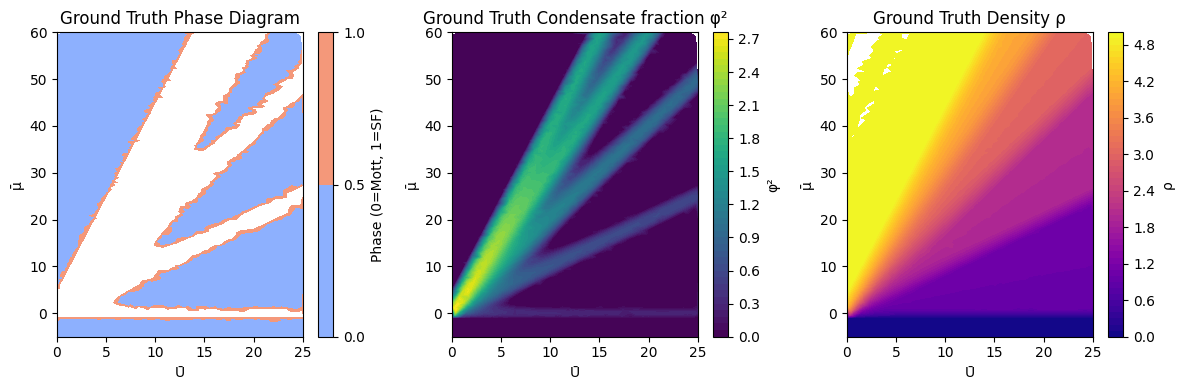

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap

import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from pytorch_tabnet.tab_model import TabNetClassifier


# Label: 1 = Superfluid, 0 = Mott
def label_phase(rho, phi2, tol_rho=1e-3, tol_phi=1e-6):
    """
    Classify phase:
    - Mott insulator if (rho ~ integer) and (phi^2 ~ 0).
    - Superfluid otherwise.
    """
    is_integer_rho = np.isclose(rho, np.round(rho), atol=tol_rho)
    is_zero_phi = phi2 < tol_phi
    
    if is_integer_rho and is_zero_phi:
        return 0  # Mott
    else:
        return 1  # Superfluid

        
# # ---------- 1) Load and label ----------
# df = pd.read_csv("phase_t1.0_U25.0-(0.1)_Mu60.0-(0.1).csv")

# # Label: 1 = Superfluid, 0 = Mott
# df["Phase"] = (df["Phi2"] > 1e-6).astype(int)

# # Features and target: **only** Ubar, Mubar
# X = df[["Ubar", "Mubar"]].copy()
# y = df["Phase"].copy()

# # Train/test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.25, random_state=42,
#     stratify=y
# )


# # Apply physics-based labeling
# df["Phase"] = df.apply(lambda row: label_phase(row["Density"], row["Phi2"]), axis=1)

# # Features and target: **only** Ubar, Mubar
# X = df[["Ubar", "Mubar"]].copy()
# y = df["Phase"].copy()

# # Train/test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.25, random_state=42,
#     stratify=y
# )

# ---------- 1) Load and label ----------
df = pd.read_csv("phase_t1.0_U25.0-(0.1)_Mu60.0-(0.1).csv")

# Apply physics-based labeling (optional, but consistent)
df["Phase"] = df.apply(lambda row: label_phase(row["Density"], row["Phi2"]), axis=1)




# --- pick deep MI (phi2 ≈ 0, density ~ integer) ---



df_MI = df[
    (df["Phi2"] < 1e-8) &
    (np.isclose(df["Density"], np.round(df["Density"]), atol=1e-3))
]

# --- pick deep SF (large phi2) ---
df_SF = df[df["Phi2"] > 1e-2]

# --- pick boundary (ambiguous region) ---
df_boundary = df[
    (df["Phi2"] > 1e-6) & (df["Phi2"] < 1e-2)
]

# ------------------------------
# Smart sampling strategy
# ------------------------------
# n_MI = min(2000, len(df_MI))             # cap deep MI
# n_SF = min(2000, len(df_SF))             # cap deep SF
# n_boundary = min(6000, len(df_boundary)) # oversample boundary

# n_MI = min(5000, len(df_MI))
# n_SF = min(5000, len(df_SF))
# n_boundary = min(10000, len(df_boundary))

n_MI = min(3000, len(df_MI))
n_SF = min(3000, len(df_SF))
n_boundary = min(6000, len(df_boundary))


df_reduced = pd.concat([
    df_MI.sample(n_MI, random_state=42),
    df_SF.sample(n_SF, random_state=42),
    df_boundary.sample(n_boundary, random_state=42)
])
print(df)
df_reduced = df_reduced.reset_index(drop=True)
# Use reduced dataset
df = df_reduced.reset_index(drop=True)
print(df)


print("Reduced dataset summary:")
print(df_reduced["Phase"].value_counts())

# Ground truth plots from dataset
plt.figure(figsize=(12,4))

# 1) Phase diagram
plt.subplot(1,3,1)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Phase"], levels=1, cmap="coolwarm"
)
plt.colorbar(label="Phase (0=Mott, 1=SF)")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Phase Diagram")

# 2) Phi²
plt.subplot(1,3,2)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Phi2"], 50, cmap="viridis"
)
plt.colorbar(label="φ²")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Condensate fraction φ²")

# 3) Density
plt.subplot(1,3,3)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Density"], 50, cmap="plasma"
)
plt.colorbar(label="ρ")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Density ρ")

plt.tight_layout()
plt.show()


        t  Ubar  Mubar       Density          Phi2        Energy  Iters  Phase
0     1.0  24.4   13.4  1.000000e+00  6.034134e-14 -1.340000e+01      9      0
1     1.0  16.0   -1.1  8.624612e-11  8.624612e-11  9.487073e-12    101      0
2     1.0  22.4    6.0  1.000000e+00  5.328648e-14 -6.000000e+00     10      0
3     1.0  14.2   22.4  2.000000e+00  6.649626e-12 -3.060000e+01     37      0
4     1.0  22.0    7.5  1.000000e+00  1.363996e-14 -7.500000e+00     10      0
...   ...   ...    ...           ...           ...           ...    ...    ...
6679  1.0   3.6   -1.0  8.456767e-05  8.456471e-05  4.598585e-09   4589      1
6680  1.0   5.3   26.2  4.999955e+00  2.254263e-04 -7.800000e+01   7465      1
6681  1.0  10.9   17.5  2.000244e+00  2.100670e-03 -2.410000e+01   2451      1
6682  1.0  16.3   -1.0  6.803388e-05  6.803021e-05  4.123775e-09   4118      1
6683  1.0   5.1   25.4  4.999955e+00  2.261209e-04 -7.600000e+01   7477      1

[6684 rows x 8 columns]
Epoch 1/200
12/12 ━━━━━━━━━

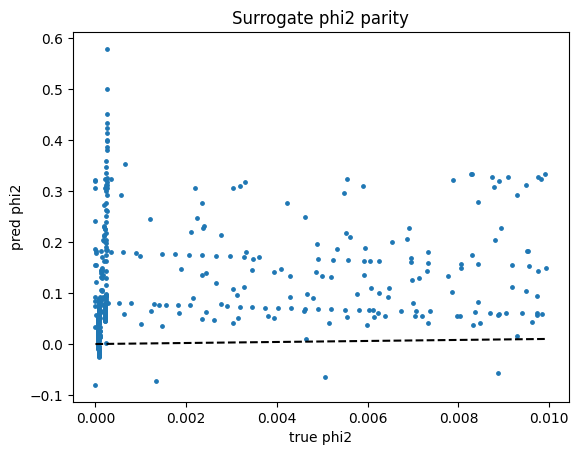

Epoch 0: lam_phys_current=0.000000
Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 5.8882 - phase_accuracy: 0.6011 - phase_loss: 0.6569 - phi2_loss: 0.6858 - phys_res_loss: 0.5611 - rho_loss: 3.8762 - val_loss: 2.3549 - val_phase_accuracy: 0.6002 - val_phase_loss: 0.8554 - val_phi2_loss: 0.4956 - val_phys_res_loss: 0.4081 - val_rho_loss: 0.5782 - learning_rate: 0.0010
Epoch 1: lam_phys_current=0.000000
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1231 - phase_accuracy: 0.7317 - phase_loss: 0.6225 - phi2_loss: 0.6738 - phys_res_loss: 0.5467 - rho_loss: 0.2739 - val_loss: 1.9279 - val_phase_accuracy: 0.4726 - val_phase_loss: 0.8542 - val_phi2_loss: 0.4956 - val_phys_res_loss: 0.4082 - val_rho_loss: 0.1530 - learning_rate: 0.0010
Epoch 2: lam_phys_current=0.000000
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8905 - phase_accuracy: 0.7847 - phase_loss: 0.5870 - phi2_loss: 0.6727 - phys_res_loss: 0.5484 - rho_loss: 0.0788 - val_loss: 1.8480 - val_

In [18]:
# --- 1) Load data ---
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# # Load dataset
# df = reduced_df

print(df)

# Features and targets
X = df[["Ubar","Mubar"]].values.astype(np.float32)
y = {
    "phase": df["Phase"].values.astype(np.float32),
    "phi2": df["Phi2"].values.astype(np.float32),
    "rho": df["Density"].values.astype(np.float32),
}

# --- 2) Train surrogate model ---
def build_surrogate(hidden=(128,64)):
    inp = keras.Input(shape=(2,))
    x = inp
    for h in hidden:
        x = layers.Dense(h, activation="relu")(x)
    out = layers.Dense(2, activation="linear")(x)   # [phi2, rho]
    m = keras.Model(inp, out)
    m.compile(optimizer="adam", loss="mse")
    return m

X_surr = df[["Ubar","Mubar"]].values.astype(np.float32)
y_surr = df[["Phi2","Density"]].values.astype(np.float32)

surrogate = build_surrogate()
surrogate.fit(
    X_surr, y_surr,
    epochs=200, batch_size=512,
    validation_split=0.15, verbose=1
)

# Surrogate validation
from sklearn.metrics import mean_squared_error, mean_absolute_error
X_val = X_surr[-500:]   # or better: shuffle and split properly
y_val = y_surr[-500:]
y_pred = surrogate.predict(X_val)
print("Surrogate MSE:", mean_squared_error(y_val, y_pred))
print("Surrogate MAE:", mean_absolute_error(y_val, y_pred))

# parity plot
import matplotlib.pyplot as plt
plt.scatter(y_val[:,0], y_pred[:,0], s=6); plt.xlabel("true phi2"); plt.ylabel("pred phi2"); plt.title("Surrogate phi2 parity")
plt.plot([y_val[:,0].min(), y_val[:,0].max()],[y_val[:,0].min(), y_val[:,0].max()], 'k--'); plt.show()


# Save & reload in new Keras format
surrogate.save("surrogate_phi_rho.keras")
surrogate = keras.models.load_model("surrogate_phi_rho.keras", compile=False)
surrogate.trainable = False   # freeze surrogate

# --- 3) PINN with surrogate residual ---
def make_pinn_with_surrogate(hidden=(128,64), lam_phase=1.0, lam_phys=1.0):
    inp = keras.Input(shape=(2,), name="input")   # [Ubar, Mubar]
    lam_phys_var = tf.Variable(lam_phys, trainable=False, dtype=tf.float32, name="lam_phys")
    x = inp
    for h in hidden:
        x = layers.Dense(h, activation="tanh")(x)

    phase_out = layers.Dense(1, activation="sigmoid", name="phase")(x)
    phi_out   = layers.Dense(1, activation="relu", name="phi2")(x)
    rho_out   = layers.Dense(1, activation="relu", name="rho")(x)

    # Physics residual via surrogate
    def phys_residual(inputs):
        UMb, phi_pred = inputs[0], inputs[1]
        s = surrogate(UMb)                  # surrogate predictions [phi2, rho]
        s_phi = tf.expand_dims(s[:, 0], -1) # only phi2
        return phi_pred - s_phi

    phys_out = layers.Lambda(
        lambda t: phys_residual([t[0], t[1]]),
        name="phys_res"
    )([inp, phi_out])

    model = keras.Model(inputs=inp, outputs=[phase_out, phi_out, rho_out, phys_out])

    losses = {
        "phase": "binary_crossentropy",
        "phi2": "mse",
        "rho": "mse",
        "phys_res": lambda y_true, y_pred: lam_phys_var * tf.reduce_mean(tf.square(y_pred))
    }
    loss_weights = {"phase": lam_phase, "phi2": 1.0, "rho": 1.0, "phys_res": 1.0}

    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss=losses,
        loss_weights=loss_weights,
        metrics={"phase":"accuracy"}
    )
    model.lam_phys = lam_phys_var
    return model

pinn_surrogate = make_pinn_with_surrogate()

# --- 4) Train PINN ---
y_targets = {
    "phase": df["Phase"].values.reshape(-1,1).astype(np.float32),
    "phi2":  df["Phi2"].values.reshape(-1,1).astype(np.float32),
    "rho":   df["Density"].values.reshape(-1,1).astype(np.float32),
    "phys_res": np.zeros((len(df),1), dtype=np.float32)
}


def mc_predict(model, X, n=50):
    preds = []
    for _ in range(n):
        p = model(X, training=True)  # keep dropout active
        preds.append(p[0].numpy())   # phase output
    preds = np.stack(preds, axis=0)
    return preds.mean(0), preds.std(0)

    
ramp_cb = LambdaRamp(start_epoch=5, end_epoch=40, final_value=1.0)
history = pinn_surrogate.fit(
    X, y_targets,
    batch_size=256,
    epochs=200,
    validation_split=0.15,
    callbacks=[
        keras.callbacks.ReduceLROnPlateau(patience=8, factor=0.5),ramp_cb
        # keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True)
    ]
)



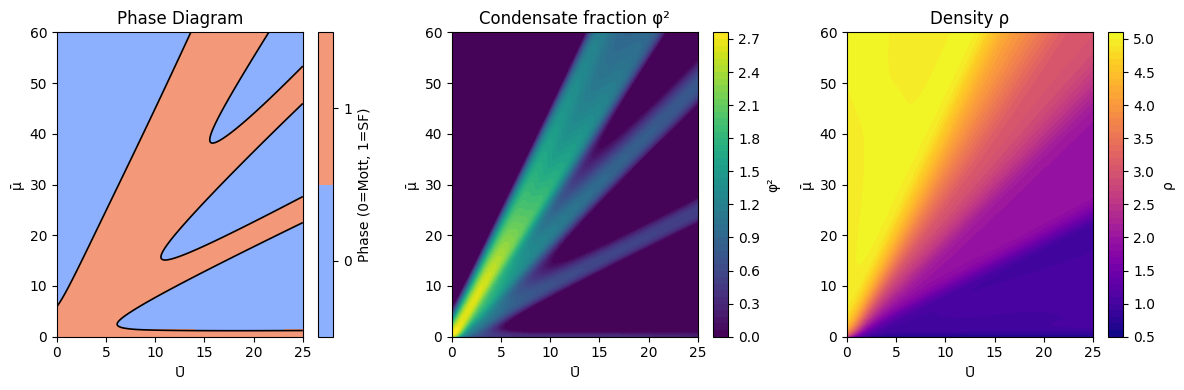

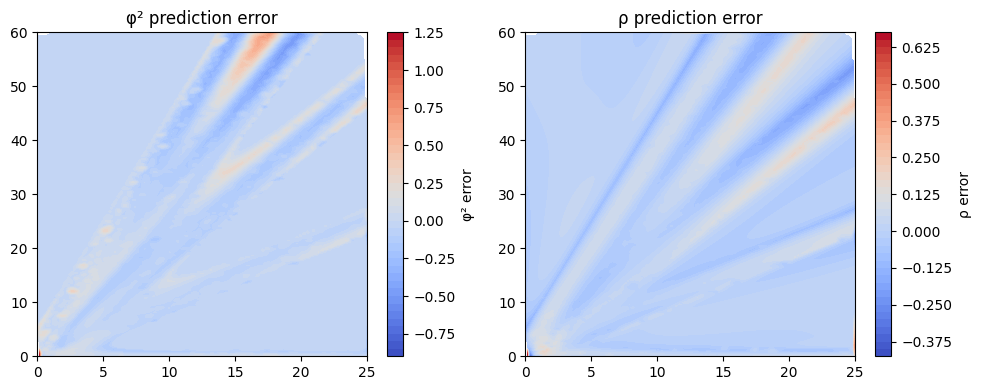

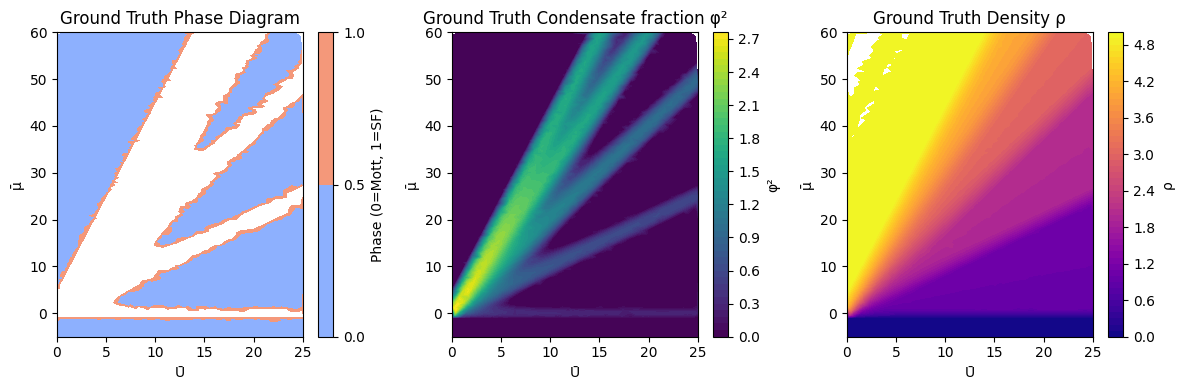


📊 Classification Report (Phase):
              precision    recall  f1-score   support

           0     0.9075    0.9807    0.9426      3000
           1     0.9831    0.9186    0.9498      3684

    accuracy                         0.9464      6684
   macro avg     0.9453    0.9496    0.9462      6684
weighted avg     0.9492    0.9464    0.9466      6684



C:\Users\DELL\AppData\Local\Temp\ipykernel_23724\2991935851.py:106: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_true_labels = df["Phase"].astype(int).ravel()


In [21]:
# --- 5) Phase diagram prediction ---
U_vals = np.linspace(0, 25, 200)   # Ū axis
mu_vals = np.linspace(0, 60, 200)  # μ̄ axis
UU, MU = np.meshgrid(U_vals, mu_vals)
X_grid = np.stack([UU.ravel(), MU.ravel()], axis=1).astype(np.float32)

# Predict → 4 outputs
y_pred_grid = pinn_surrogate.predict(X_grid, verbose=0)
phase_pred, phi2_pred, rho_pred, _ = y_pred_grid

phase_pred = phase_pred.reshape(UU.shape)
phi2_pred  = phi2_pred.reshape(UU.shape)
rho_pred   = rho_pred.reshape(UU.shape)
phase_pred_class = (phase_pred > 0.5).astype(int)

plt.figure(figsize=(12,4))

# --- Phase diagram ---
plt.subplot(1,3,1)
mappable = plt.contourf(UU, MU, phase_pred_class,
                        levels=[-0.5, 0.5, 1.5], cmap="coolwarm")
plt.colorbar(mappable, ticks=[0, 1], label="Phase (0=Mott, 1=SF)")
plt.contour(UU, MU, phase_pred, levels=[0.5], colors="k", linewidths=1.2)  # phase boundary
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Phase Diagram")

# --- φ² diagram ---
plt.subplot(1,3,2)
mappable = plt.contourf(UU, MU, phi2_pred, 50, cmap="viridis")
plt.colorbar(mappable, label="φ²")
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Condensate fraction φ²")

# --- ρ diagram ---
plt.subplot(1,3,3)
mappable = plt.contourf(UU, MU, rho_pred, 50, cmap="plasma")
plt.colorbar(mappable, label="ρ")
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Density ρ")

plt.tight_layout()
plt.show()

from scipy.interpolate import griddata

# Ground truth values
points = df[["Ubar","Mubar"]].values
phi2_true_interp = griddata(points, df["Phi2"].values, (UU, MU), method="linear")
rho_true_interp  = griddata(points, df["Density"].values, (UU, MU), method="linear")

# Compute errors on grid
phi2_err = phi2_pred - phi2_true_interp
rho_err  = rho_pred - rho_true_interp

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.contourf(UU, MU, phi2_err, 50, cmap="coolwarm")
plt.colorbar(label="φ² error")
plt.title("φ² prediction error")

plt.subplot(1,2,2)
plt.contourf(UU, MU, rho_err, 50, cmap="coolwarm")
plt.colorbar(label="ρ error")
plt.title("ρ prediction error")
plt.tight_layout(); plt.show()



# Ground truth plots from dataset
plt.figure(figsize=(12,4))

# 1) Phase diagram
plt.subplot(1,3,1)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Phase"], levels=1, cmap="coolwarm"
)
plt.colorbar(label="Phase (0=Mott, 1=SF)")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Phase Diagram")

# 2) Phi²
plt.subplot(1,3,2)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Phi2"], 50, cmap="viridis"
)
plt.colorbar(label="φ²")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Condensate fraction φ²")

# 3) Density
plt.subplot(1,3,3)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Density"], 50, cmap="plasma"
)
plt.colorbar(label="ρ")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Density ρ")

plt.tight_layout()
plt.show()


# --- 6) Classification report ---
y_pred_phase, y_pred_phi2, y_pred_rho, _ = pinn_surrogate.predict(X, verbose=0)
y_pred_labels = (y_pred_phase > 0.5).astype(int).ravel()
y_true_labels = df["Phase"].astype(int).ravel()

print("\n📊 Classification Report (Phase):")
print(classification_report(y_true_labels, y_pred_labels, digits=4))


In [22]:
# --- 6) Classification report on FULL dataset ---
df_full = pd.read_csv("phase_t1.0_U25.0-(0.1)_Mu60.0-(0.1).csv")
df_full["Phase"] = df_full.apply(lambda row: label_phase(row["Density"], row["Phi2"]), axis=1)

X_full = df_full[["Ubar","Mubar"]].values.astype(np.float32)
y_true_full = df_full["Phase"].astype(int).ravel()

# Predict with trained model
y_pred_phase_full, _, _, _ = pinn_surrogate.predict(X_full, verbose=0)
y_pred_labels_full = (y_pred_phase_full > 0.5).astype(int).ravel()

from sklearn.metrics import classification_report
print("\n📊 Classification Report (Phase, FULL dataset):")
print(classification_report(y_true_full, y_pred_labels_full, digits=4))

C:\Users\DELL\AppData\Local\Temp\ipykernel_23724\1968048930.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_true_full = df_full["Phase"].astype(int).ravel()



📊 Classification Report (Phase, FULL dataset):
              precision    recall  f1-score   support

           0     0.9938    0.9779    0.9858     97450
           1     0.9681    0.9910    0.9794     65951

    accuracy                         0.9832    163401
   macro avg     0.9810    0.9845    0.9826    163401
weighted avg     0.9835    0.9832    0.9832    163401



## Updating the surrogate model 

- Surrogate

    1. Separate heads for φ² & ρ
    
    2. softplus instead of relu (better for smooth positive values)
    
    3. Added light dropout (0.1)

- PINN

    1. Phase weighted more (lam_phase=3.0)
    
    2. Physics residual weaker (lam_phys=0.5)
    
    3. Residual ramp starts at epoch 20 → 80, not 5 → 40

- Training

    1. Should now prioritize phase accuracy first, then gradually enforce physics.

          t  Ubar  Mubar       Density          Phi2        Energy  Iters  \
0       1.0   0.0   -5.0  1.048576e-14  1.048576e-14  2.097152e-13      8   
1       1.0   0.0   -4.9  1.508449e-14  1.508449e-14  2.882646e-13      8   
2       1.0   0.0   -4.8  2.186340e-14  2.186340e-14  3.987884e-13      8   
3       1.0   0.0   -4.7  3.193733e-14  3.193733e-14  5.553901e-13      8   
4       1.0   0.0   -4.6  4.703477e-14  4.703477e-14  7.788958e-13      8   
...     ...   ...    ...           ...           ...           ...    ...   
163396  1.0  25.0   59.6  3.000000e+00  8.530376e-13 -1.038000e+02     21   
163397  1.0  25.0   59.7  3.000000e+00  7.586920e-13 -1.041000e+02     21   
163398  1.0  25.0   59.8  3.000000e+00  6.791729e-13 -1.044000e+02     21   
163399  1.0  25.0   59.9  3.000000e+00  6.119027e-13 -1.047000e+02     21   
163400  1.0  25.0   60.0  3.000000e+00  5.548081e-13 -1.050000e+02     21   

        Phase  
0           0  
1           0  
2           0  
3          

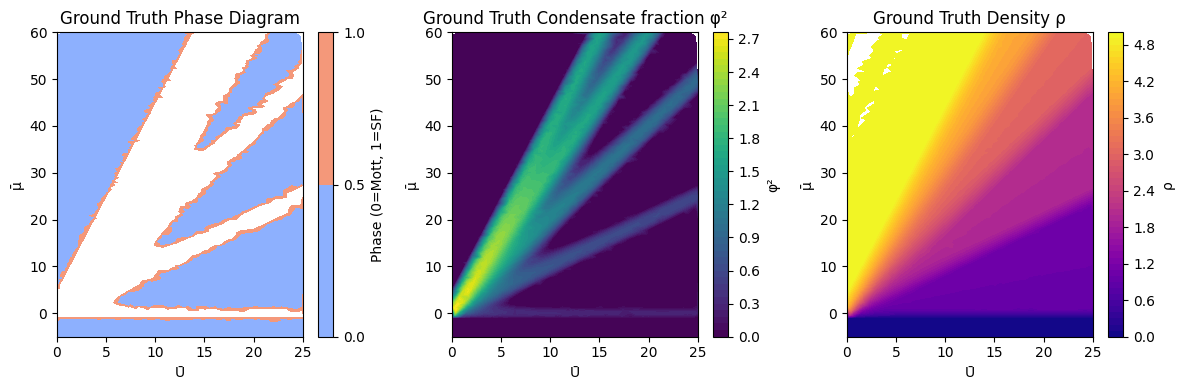

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap

import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from pytorch_tabnet.tab_model import TabNetClassifier


# Label: 1 = Superfluid, 0 = Mott
def label_phase(rho, phi2, tol_rho=1e-3, tol_phi=1e-6):
    """
    Classify phase:
    - Mott insulator if (rho ~ integer) and (phi^2 ~ 0).
    - Superfluid otherwise.
    """
    is_integer_rho = np.isclose(rho, np.round(rho), atol=tol_rho)
    is_zero_phi = phi2 < tol_phi
    
    if is_integer_rho and is_zero_phi:
        return 0  # Mott
    else:
        return 1  # Superfluid

        
# # ---------- 1) Load and label ----------
# df = pd.read_csv("phase_t1.0_U25.0-(0.1)_Mu60.0-(0.1).csv")

# # Label: 1 = Superfluid, 0 = Mott
# df["Phase"] = (df["Phi2"] > 1e-6).astype(int)

# # Features and target: **only** Ubar, Mubar
# X = df[["Ubar", "Mubar"]].copy()
# y = df["Phase"].copy()

# # Train/test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.25, random_state=42,
#     stratify=y
# )


# # Apply physics-based labeling
# df["Phase"] = df.apply(lambda row: label_phase(row["Density"], row["Phi2"]), axis=1)

# # Features and target: **only** Ubar, Mubar
# X = df[["Ubar", "Mubar"]].copy()
# y = df["Phase"].copy()

# # Train/test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.25, random_state=42,
#     stratify=y
# )

# ---------- 1) Load and label ----------
df = pd.read_csv("phase_t1.0_U25.0-(0.1)_Mu60.0-(0.1).csv")

# Apply physics-based labeling (optional, but consistent)
df["Phase"] = df.apply(lambda row: label_phase(row["Density"], row["Phi2"]), axis=1)




# --- pick deep MI (phi2 ≈ 0, density ~ integer) ---



df_MI = df[
    (df["Phi2"] < 1e-8) &
    (np.isclose(df["Density"], np.round(df["Density"]), atol=1e-3))
]

# --- pick deep SF (large phi2) ---
df_SF = df[df["Phi2"] > 1e-2]

# --- pick boundary (ambiguous region) ---
df_boundary = df[
    (df["Phi2"] > 1e-6) & (df["Phi2"] < 1e-2)
]

# ------------------------------
# Smart sampling strategy
# ------------------------------
# n_MI = min(2000, len(df_MI))             # cap deep MI
# n_SF = min(2000, len(df_SF))             # cap deep SF
# n_boundary = min(6000, len(df_boundary)) # oversample boundary

# n_MI = min(5000, len(df_MI))
# n_SF = min(5000, len(df_SF))
# n_boundary = min(10000, len(df_boundary))

n_MI = min(3000, len(df_MI))
n_SF = min(3000, len(df_SF))
n_boundary = min(6000, len(df_boundary))


df_reduced = pd.concat([
    df_MI.sample(n_MI, random_state=42),
    df_SF.sample(n_SF, random_state=42),
    df_boundary.sample(n_boundary, random_state=42)
])
print(df)
df_reduced = df_reduced.reset_index(drop=True)
# Use reduced dataset
df = df_reduced.reset_index(drop=True)
print(df)


print("Reduced dataset summary:")
print(df_reduced["Phase"].value_counts())

# Ground truth plots from dataset
plt.figure(figsize=(12,4))

# 1) Phase diagram
plt.subplot(1,3,1)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Phase"], levels=1, cmap="coolwarm"
)
plt.colorbar(label="Phase (0=Mott, 1=SF)")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Phase Diagram")

# 2) Phi²
plt.subplot(1,3,2)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Phi2"], 50, cmap="viridis"
)
plt.colorbar(label="φ²")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Condensate fraction φ²")

# 3) Density
plt.subplot(1,3,3)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Density"], 50, cmap="plasma"
)
plt.colorbar(label="ρ")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Density ρ")

plt.tight_layout()
plt.show()


In [29]:
# --- 1) Surrogate builder ---
def build_surrogate(hidden=(128,64)):
    inp = keras.Input(shape=(2,))
    x = inp
    for h in hidden:
        x = layers.Dense(h, activation="relu")(x)
        x = layers.Dropout(0.1)(x)   # small dropout for generalization
    phi_out = layers.Dense(1, activation="softplus", name="phi2")(x)
    rho_out = layers.Dense(1, activation="softplus", name="rho")(x)
    m = keras.Model(inp, [phi_out, rho_out])
    m.compile(optimizer="adam", loss="mse")
    return m

# --- 2) PINN with surrogate residual ---
# --- 2) PINN with surrogate residual (fixed shape + ramp attr) ---
# assume `surrogate` is already built, saved/loaded and frozen (surrogate.trainable = False)
# and X, y_targets etc are defined as in your notebook.

# --- 3) PINN with surrogate residual ---
def make_pinn_with_surrogate(hidden=(128,64), lam_phase=2.0, lam_phys=1.0):
    inp = keras.Input(shape=(2,), name="input")   # [Ubar, Mubar]
    lam_phys_var = tf.Variable(lam_phys, trainable=False, dtype=tf.float32, name="lam_phys")
    x = inp
    for h in hidden:
        x = layers.Dense(h, activation="tanh")(x)

    phase_out = layers.Dense(1, activation="sigmoid", name="phase")(x)
    phi_out   = layers.Dense(1, activation="relu", name="phi2")(x)
    rho_out   = layers.Dense(1, activation="relu", name="rho")(x)

    # Physics residual via surrogate
    def phys_residual(inputs):
        UMb, phi_pred = inputs[0], inputs[1]
        s = surrogate(UMb)                  # surrogate predicts [phi2, rho]
        s_phi = tf.expand_dims(s[:, 0], -1) # only phi2
        return phi_pred - s_phi

    phys_out = layers.Lambda(
        lambda t: phys_residual([t[0], t[1]]),
        output_shape=(1,),
        name="phys_res"
    )([inp, phi_out])

    model = keras.Model(inputs=inp, outputs=[phase_out, phi_out, rho_out, phys_out])

    losses = {
        "phase": "binary_crossentropy",
        "phi2": "mse",
        "rho": "mse",
        "phys_res": lambda y_true, y_pred: lam_phys_var * tf.reduce_mean(tf.square(y_pred))
    }
    # ↑ phase weight boosted from 1.0 → 2.0
    loss_weights = {"phase": lam_phase, "phi2": 1.0, "rho": 1.0, "phys_res": 1.0}

    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss=losses,
        loss_weights=loss_weights,
        metrics={"phase":"accuracy"}
    )
    model.lam_phys = lam_phys_var
    return model

# --- 3) Train PINN ---
y_targets = {
    "phase": df["Phase"].values.reshape(-1,1).astype(np.float32),
    "phi2":  df["Phi2"].values.reshape(-1,1).astype(np.float32),
    "rho":   df["Density"].values.reshape(-1,1).astype(np.float32),
    "phys_res": np.zeros((len(df),1), dtype=np.float32)
}
# --- 4) Train PINN with ramp capped at 0.3 ---
pinn_surrogate = make_pinn_with_surrogate()

ramp_cb = LambdaRamp(start_epoch=5, end_epoch=40, final_value=0.3)  # was 1.0 before

history = pinn_surrogate.fit(
    X, y_targets,
    batch_size=256,
    epochs=200,
    validation_split=0.15,
    callbacks=[
        keras.callbacks.ReduceLROnPlateau(patience=8, factor=0.5),
        ramp_cb
    ]
)






# # Physics residual ramp: start later
# # ramp_cb = LambdaRamp(start_epoch=20, end_epoch=80, final_value=1.0)

# pinn_surrogate = make_pinn_with_surrogate(lam_phase=3.0, lam_phys=0.0)
# ramp_cb = LambdaRamp(start_epoch=5, end_epoch=40, final_value=1.0)

# history = pinn_surrogate.fit(
#     X, y_targets,
#     batch_size=256,
#     epochs=200,
#     validation_split=0.15,
#     callbacks=[keras.callbacks.ReduceLROnPlateau(patience=8, factor=0.5), ramp_cb]
# )



Epoch 0: lam_phys_current=0.000000
Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 8.7250 - phase_accuracy: 0.5494 - phase_loss: 0.6834 - phi2_loss: 0.4261 - phys_res_loss: 0.3748 - rho_loss: 6.3899 - val_loss: 4.1874 - val_phase_accuracy: 0.4128 - val_phase_loss: 1.0364 - val_phi2_loss: 0.4369 - val_phys_res_loss: 0.3176 - val_rho_loss: 1.3666 - learning_rate: 0.0010
Epoch 1: lam_phys_current=0.000000
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4854 - phase_accuracy: 0.5429 - phase_loss: 0.6643 - phi2_loss: 0.3096 - phys_res_loss: 0.2753 - rho_loss: 0.5592 - val_loss: 2.2402 - val_phase_accuracy: 0.5942 - val_phase_loss: 0.7389 - val_phi2_loss: 0.2799 - val_phys_res_loss: 0.1775 - val_rho_loss: 0.3046 - learning_rate: 0.0010
Epoch 2: lam_phys_current=0.000000
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9141 - phase_accuracy: 0.7296 - phase_loss: 0.6218 - phi2_loss: 0.2376 - phys_res_loss: 0.2029 - rho_loss: 0.2289 - val_loss: 2.2458 - val_

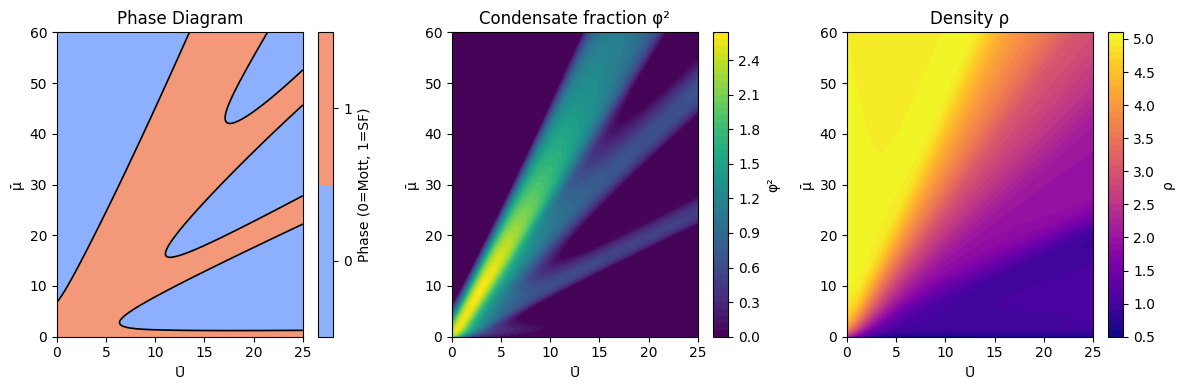

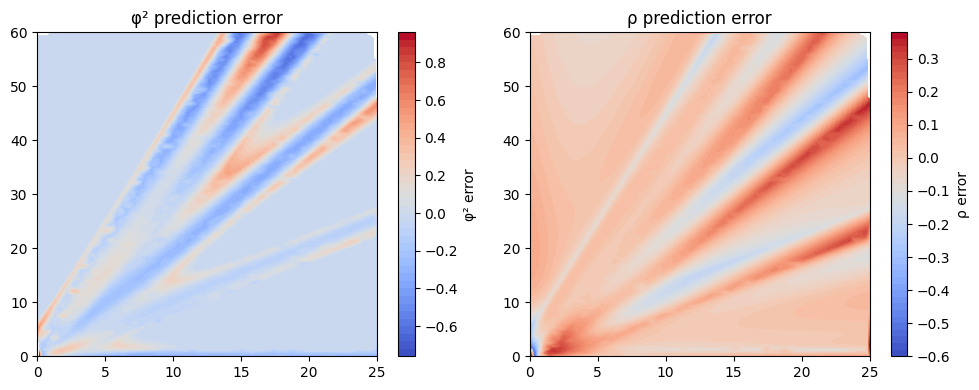

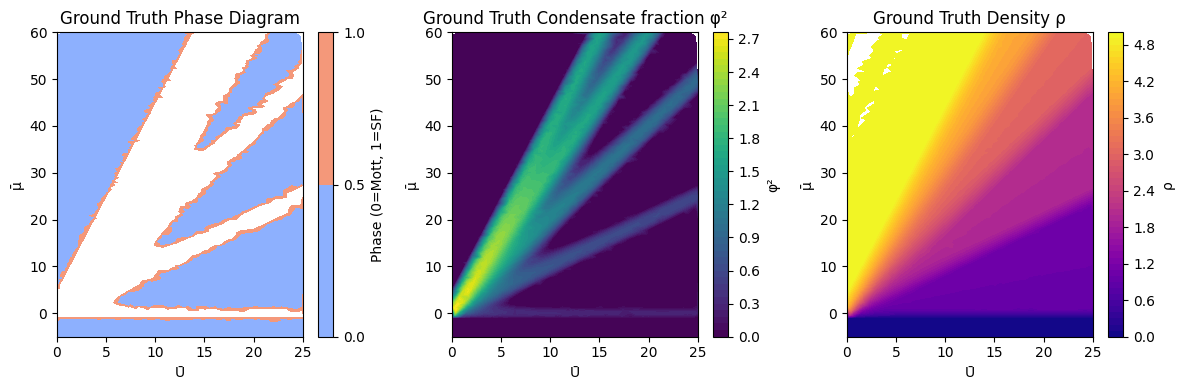


📊 Classification Report (Phase):
              precision    recall  f1-score   support

           0     0.9045    0.9600    0.9314      3000
           1     0.9657    0.9175    0.9410      3684

    accuracy                         0.9366      6684
   macro avg     0.9351    0.9387    0.9362      6684
weighted avg     0.9382    0.9366    0.9367      6684



C:\Users\DELL\AppData\Local\Temp\ipykernel_23724\2991935851.py:106: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_true_labels = df["Phase"].astype(int).ravel()


In [30]:
# --- 5) Phase diagram prediction ---
U_vals = np.linspace(0, 25, 200)   # Ū axis
mu_vals = np.linspace(0, 60, 200)  # μ̄ axis
UU, MU = np.meshgrid(U_vals, mu_vals)
X_grid = np.stack([UU.ravel(), MU.ravel()], axis=1).astype(np.float32)

# Predict → 4 outputs
y_pred_grid = pinn_surrogate.predict(X_grid, verbose=0)
phase_pred, phi2_pred, rho_pred, _ = y_pred_grid

phase_pred = phase_pred.reshape(UU.shape)
phi2_pred  = phi2_pred.reshape(UU.shape)
rho_pred   = rho_pred.reshape(UU.shape)
phase_pred_class = (phase_pred > 0.5).astype(int)

plt.figure(figsize=(12,4))

# --- Phase diagram ---
plt.subplot(1,3,1)
mappable = plt.contourf(UU, MU, phase_pred_class,
                        levels=[-0.5, 0.5, 1.5], cmap="coolwarm")
plt.colorbar(mappable, ticks=[0, 1], label="Phase (0=Mott, 1=SF)")
plt.contour(UU, MU, phase_pred, levels=[0.5], colors="k", linewidths=1.2)  # phase boundary
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Phase Diagram")

# --- φ² diagram ---
plt.subplot(1,3,2)
mappable = plt.contourf(UU, MU, phi2_pred, 50, cmap="viridis")
plt.colorbar(mappable, label="φ²")
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Condensate fraction φ²")

# --- ρ diagram ---
plt.subplot(1,3,3)
mappable = plt.contourf(UU, MU, rho_pred, 50, cmap="plasma")
plt.colorbar(mappable, label="ρ")
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Density ρ")

plt.tight_layout()
plt.show()

from scipy.interpolate import griddata

# Ground truth values
points = df[["Ubar","Mubar"]].values
phi2_true_interp = griddata(points, df["Phi2"].values, (UU, MU), method="linear")
rho_true_interp  = griddata(points, df["Density"].values, (UU, MU), method="linear")

# Compute errors on grid
phi2_err = phi2_pred - phi2_true_interp
rho_err  = rho_pred - rho_true_interp

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.contourf(UU, MU, phi2_err, 50, cmap="coolwarm")
plt.colorbar(label="φ² error")
plt.title("φ² prediction error")

plt.subplot(1,2,2)
plt.contourf(UU, MU, rho_err, 50, cmap="coolwarm")
plt.colorbar(label="ρ error")
plt.title("ρ prediction error")
plt.tight_layout(); plt.show()



# Ground truth plots from dataset
plt.figure(figsize=(12,4))

# 1) Phase diagram
plt.subplot(1,3,1)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Phase"], levels=1, cmap="coolwarm"
)
plt.colorbar(label="Phase (0=Mott, 1=SF)")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Phase Diagram")

# 2) Phi²
plt.subplot(1,3,2)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Phi2"], 50, cmap="viridis"
)
plt.colorbar(label="φ²")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Condensate fraction φ²")

# 3) Density
plt.subplot(1,3,3)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Density"], 50, cmap="plasma"
)
plt.colorbar(label="ρ")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Density ρ")

plt.tight_layout()
plt.show()


# --- 6) Classification report ---
y_pred_phase, y_pred_phi2, y_pred_rho, _ = pinn_surrogate.predict(X, verbose=0)
y_pred_labels = (y_pred_phase > 0.5).astype(int).ravel()
y_true_labels = df["Phase"].astype(int).ravel()

print("\n📊 Classification Report (Phase):")
print(classification_report(y_true_labels, y_pred_labels, digits=4))


In [31]:
# --- 6) Classification report on FULL dataset ---
df_full = pd.read_csv("phase_t1.0_U25.0-(0.1)_Mu60.0-(0.1).csv")
df_full["Phase"] = df_full.apply(lambda row: label_phase(row["Density"], row["Phi2"]), axis=1)

X_full = df_full[["Ubar","Mubar"]].values.astype(np.float32)
y_true_full = df_full["Phase"].astype(int).ravel()

# Predict with trained model
y_pred_phase_full, _, _, _ = pinn_surrogate.predict(X_full, verbose=0)
y_pred_labels_full = (y_pred_phase_full > 0.5).astype(int).ravel()

from sklearn.metrics import classification_report
print("\n📊 Classification Report (Phase, FULL dataset):")
print(classification_report(y_true_full, y_pred_labels_full, digits=4))

C:\Users\DELL\AppData\Local\Temp\ipykernel_23724\1968048930.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_true_full = df_full["Phase"].astype(int).ravel()



📊 Classification Report (Phase, FULL dataset):
              precision    recall  f1-score   support

           0     0.9901    0.9564    0.9730     97450
           1     0.9387    0.9859    0.9617     65951

    accuracy                         0.9683    163401
   macro avg     0.9644    0.9711    0.9673    163401
weighted avg     0.9693    0.9683    0.9684    163401



# 30k Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap

import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from pytorch_tabnet.tab_model import TabNetClassifier


# Label: 1 = Superfluid, 0 = Mott
def label_phase(rho, phi2, tol_rho=1e-3, tol_phi=1e-6):
    """
    Classify phase:
    - Mott insulator if (rho ~ integer) and (phi^2 ~ 0).
    - Superfluid otherwise.
    """
    is_integer_rho = np.isclose(rho, np.round(rho), atol=tol_rho)
    is_zero_phi = phi2 < tol_phi
    
    if is_integer_rho and is_zero_phi:
        return 0  # Mott
    else:
        return 1  # Superfluid

        
# # ---------- 1) Load and label ----------
# df = pd.read_csv("phase_t1.0_U25.0-(0.1)_Mu60.0-(0.1).csv")

# # Label: 1 = Superfluid, 0 = Mott
# df["Phase"] = (df["Phi2"] > 1e-6).astype(int)

# # Features and target: **only** Ubar, Mubar
# X = df[["Ubar", "Mubar"]].copy()
# y = df["Phase"].copy()

# # Train/test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.25, random_state=42,
#     stratify=y
# )


# # Apply physics-based labeling
# df["Phase"] = df.apply(lambda row: label_phase(row["Density"], row["Phi2"]), axis=1)

# # Features and target: **only** Ubar, Mubar
# X = df[["Ubar", "Mubar"]].copy()
# y = df["Phase"].copy()

# # Train/test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.25, random_state=42,
#     stratify=y
# )

# ---------- 1) Load and label ----------
df = pd.read_csv("phase_t1.0_U25.0-(0.1)_Mu60.0-(0.1).csv")

# Apply physics-based labeling (optional, but consistent)
df["Phase"] = df.apply(lambda row: label_phase(row["Density"], row["Phi2"]), axis=1)




# --- pick deep MI (phi2 ≈ 0, density ~ integer) ---



df_MI = df[
    (df["Phi2"] < 1e-8) &
    (np.isclose(df["Density"], np.round(df["Density"]), atol=1e-3))
]

# --- pick deep SF (large phi2) ---
df_SF = df[df["Phi2"] > 1e-2]

# --- pick boundary (ambiguous region) ---
df_boundary = df[
    (df["Phi2"] > 1e-6) & (df["Phi2"] < 1e-2)
]

# ------------------------------
# Smart sampling strategy
# ------------------------------
# n_MI = min(2000, len(df_MI))             # cap deep MI
# n_SF = min(2000, len(df_SF))             # cap deep SF
# n_boundary = min(6000, len(df_boundary)) # oversample boundary

n_MI = min(15000, len(df_MI))
n_SF = min(15000, len(df_SF))
n_boundary = min(30000, len(df_boundary))


df_reduced = pd.concat([
    df_MI.sample(n_MI, random_state=42),
    df_SF.sample(n_SF, random_state=42),
    df_boundary.sample(n_boundary, random_state=42)
])
print(df)
df_reduced = df_reduced.reset_index(drop=True)
# Use reduced dataset
df = df_reduced.reset_index(drop=True)
print(df)


print("Reduced dataset summary:")
print(df_reduced["Phase"].value_counts())

# Ground truth plots from dataset
plt.figure(figsize=(12,4))

# 1) Phase diagram
plt.subplot(1,3,1)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Phase"], levels=1, cmap="coolwarm"
)
plt.colorbar(label="Phase (0=Mott, 1=SF)")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Phase Diagram")

# 2) Phi²
plt.subplot(1,3,2)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Phi2"], 50, cmap="viridis"
)
plt.colorbar(label="φ²")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Condensate fraction φ²")

# 3) Density
plt.subplot(1,3,3)
plt.tricontourf(
    df["Ubar"], df["Mubar"], df["Density"], 50, cmap="plasma"
)
plt.colorbar(label="ρ")
plt.xlabel("Ū")
plt.ylabel("μ̄")
plt.title("Ground Truth Density ρ")

plt.tight_layout()
plt.show()
